In [2]:
%load_ext watermark
%watermark -v -n -m -p numpy,scipy,torch,geomloss,seaborn

Python implementation: CPython
Python version       : 3.7.4
IPython version      : 7.8.0

numpy   : 1.19.0
scipy   : 1.2.1
torch   : 1.8.1
geomloss: 0.2.3
seaborn : 0.11.1

Compiler    : Clang 10.0.1 (clang-1001.0.46.4)
OS          : Darwin
Release     : 20.5.0
Machine     : x86_64
Processor   : i386
CPU cores   : 8
Architecture: 64bit



In [3]:
import sys
import importlib
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import torch
import skimage
import skimage.io
import numpy as np
from PIL import Image

from IPython.display import HTML

sys.path.append('../')
sys.path.append('../cpflow')

outdir = '../out/image_pdes/'

/Users/daalvare/.ve/gficnn/lib/python3.7/site-packages/skimage/io/manage_plugins.py:23: UserWarning: Your installed pillow version is < 7.1.0. Several security issues (CVE-2020-11538, CVE-2020-10379, CVE-2020-10994, CVE-2020-10177) have been fixed in pillow 7.1.0 or higher. We recommend to upgrade this library.
  from .collection import imread_collection_wrapper


(512, 512)


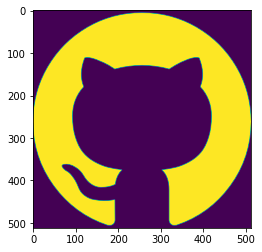

In [4]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

img = Image.open("../img/github-logo.png")
#img.show()

import numpy as np

X = np.asarray(img)

print(X.shape)

plt.imshow(X)

## Pixel-Particle Dynamics

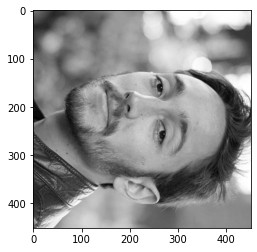

In [8]:
import PIL
from PIL import Image 
img = Image.open("../img/DAM.png")
img.convert(mode="1", dither=1)
X = np.asarray(img.rotate(-90))
plt.imshow(X)

[[0.09803922 0.09803922 0.09803922 ... 0.         0.         0.        ]
 [0.09803922 0.09803922 0.09803922 ... 0.         0.         0.        ]
 [0.09803922 0.09803922 0.09803922 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.09803922 0.09803922 0.09803922]
 [0.         0.         0.         ... 0.09803922 0.09803922 0.09803922]
 [0.         0.         0.         ... 0.09803922 0.09803922 0.09803922]] (920, 920)


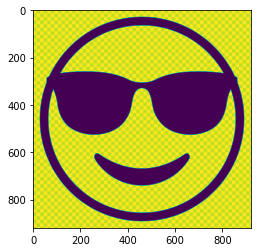

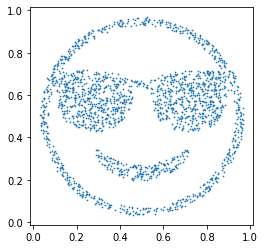

In [5]:
import src.distributions
importlib.reload(src.distributions)

from src.distributions import particles_from_image


X = particles_from_image("../img/sunglass-emoji.png", 2000, thresh=0.6, invert=False)


#X = particles_from_image("../img/DAM.png", 1000, thresh=0.6)


#X = particles_from_image("../img/neurips-logo.png", 1000, thresh=0.6)

[[0.09803922 0.09803922 0.09803922 ... 0.         0.         0.        ]
 [0.09803922 0.09803922 0.09803922 ... 0.         0.         0.        ]
 [0.09803922 0.09803922 0.09803922 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.09803922 0.09803922 0.09803922]
 [0.         0.         0.         ... 0.09803922 0.09803922 0.09803922]
 [0.         0.         0.         ... 0.09803922 0.09803922 0.09803922]] (920, 920)


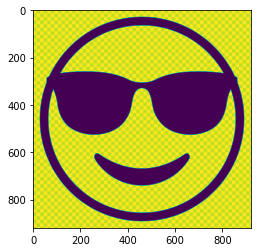

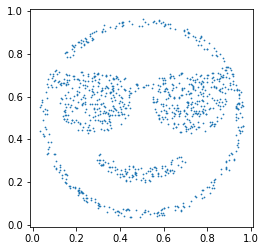

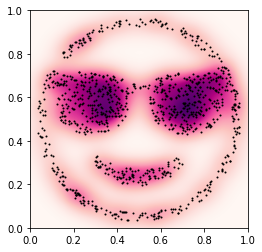

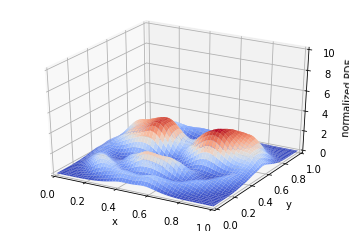

In [6]:
import scipy.stats
import src.utils
importlib.reload(src.utils)
from src.utils import meshgrid_from, density_plot_2d, density_plot_3d

importlib.reload(src.distributions)
from src.distributions import density_from_image


img_name = 'emoji'
ρ0, X0 = density_from_image(bw=0.1, path="../img/sunglass-emoji.png", n=1000, thresh=0.6, invert=False)

density_plot_2d(X0, xrng=(0,1),yrng=(0,1), bw=0.2, cmap=plt.cm.RdPu)


density_plot_3d(X0, xrng=(0,1),yrng=(0,1), bw=0.2, cmap="coolwarm")



### Heat Equation

No rdkit
tsnecuda not found - will use (slower) cpu implementation


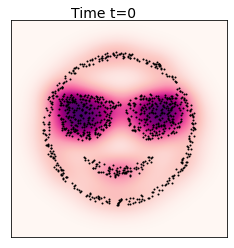

--------------------------------------------------------
Iter   W(ρ,ρ_t)  F(ρ)=ℱ*(ρ)     ‖X‖   ‖T(X)‖    ‖ΔT(X)‖
--------------------------------------------------------
Relative ratio between F and W terms in JKO is too unbalanced...
consider choosing τ in 10^[-1.0,-0.0] to balance them.
   0   1.33e+00    -2.00e+00     0.72     1.87   1.15e+00
 100   3.94e-03    -2.00e+00     0.72     0.73   8.71e-04
tensor(1.0145e-15, dtype=torch.float64) tensor(0.2014, dtype=torch.float64)

---> After JKO Step: 1, F(ρ)=6.5114e-01 <---



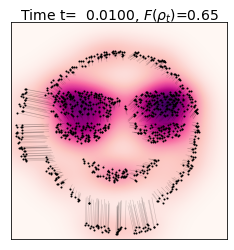

--------------------------------------------------------
Iter   W(ρ,ρ_t)  F(ρ)=ℱ*(ρ)     ‖X‖   ‖T(X)‖    ‖ΔT(X)‖
--------------------------------------------------------
   0   6.47e-03    -2.00e+00     0.73     0.72   5.51e-02
 100   2.14e-03    -2.00e+00     0.73     0.73   2.35e-04
tensor(1.2204e-15, dtype=torch.float64) tensor(0.1399, dtype=torch.float64)

---> After JKO Step: 2, F(ρ)=4.0464e-01 <---



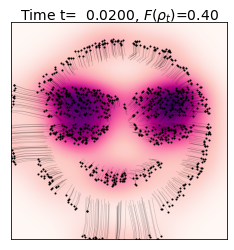

--------------------------------------------------------
Iter   W(ρ,ρ_t)  F(ρ)=ℱ*(ρ)     ‖X‖   ‖T(X)‖    ‖ΔT(X)‖
--------------------------------------------------------
   0   4.32e-03    -2.00e+00     0.73     0.72   5.33e-02
 100   1.70e-03    -2.00e+00     0.73     0.73   3.09e-04
tensor(1.2307e-15, dtype=torch.float64) tensor(0.1707, dtype=torch.float64)

---> After JKO Step: 3, F(ρ)=1.9072e-01 <---



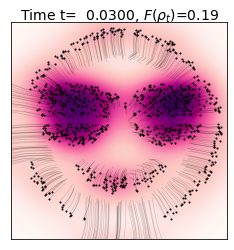

--------------------------------------------------------
Iter   W(ρ,ρ_t)  F(ρ)=ℱ*(ρ)     ‖X‖   ‖T(X)‖    ‖ΔT(X)‖
--------------------------------------------------------
   0   4.88e-03    -2.00e+00     0.73     0.73   5.39e-02
 100   1.53e-03    -2.00e+00     0.73     0.73   2.70e-04
tensor(1.0539e-15, dtype=torch.float64) tensor(0.2721, dtype=torch.float64)

---> After JKO Step: 4, F(ρ)=4.2964e-02 <---



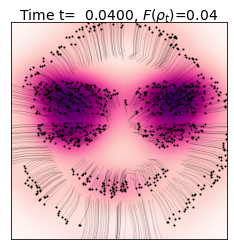

--------------------------------------------------------
Iter   W(ρ,ρ_t)  F(ρ)=ℱ*(ρ)     ‖X‖   ‖T(X)‖    ‖ΔT(X)‖
--------------------------------------------------------
   0   2.95e-03    -2.00e+00     0.73     0.73   4.46e-02
 100   1.39e-03    -2.00e+00     0.73     0.73   2.10e-04
tensor(1.1775e-15, dtype=torch.float64) tensor(0.2249, dtype=torch.float64)

---> After JKO Step: 5, F(ρ)=-1.0440e-01 <---



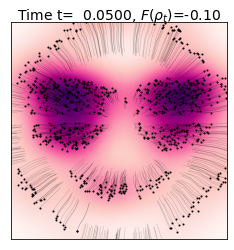

--------------------------------------------------------
Iter   W(ρ,ρ_t)  F(ρ)=ℱ*(ρ)     ‖X‖   ‖T(X)‖    ‖ΔT(X)‖
--------------------------------------------------------
   0   3.07e-03    -2.00e+00     0.73     0.73   4.12e-02
 100   1.29e-03    -2.00e+00     0.73     0.73   1.80e-04
tensor(1.1599e-15, dtype=torch.float64) tensor(0.1421, dtype=torch.float64)

---> After JKO Step: 6, F(ρ)=-2.4127e-01 <---



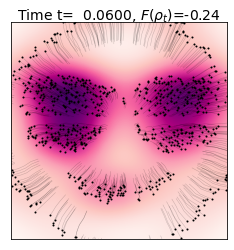

--------------------------------------------------------
Iter   W(ρ,ρ_t)  F(ρ)=ℱ*(ρ)     ‖X‖   ‖T(X)‖    ‖ΔT(X)‖
--------------------------------------------------------
   0   2.09e-03    -2.00e+00     0.73     0.73   3.57e-02
 100   1.14e-03    -2.00e+00     0.73     0.73   1.47e-04
tensor(1.1527e-15, dtype=torch.float64) tensor(0.1404, dtype=torch.float64)

---> After JKO Step: 7, F(ρ)=-3.4369e-01 <---



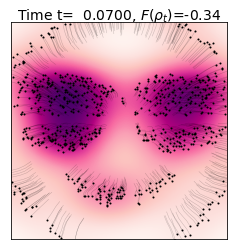

--------------------------------------------------------
Iter   W(ρ,ρ_t)  F(ρ)=ℱ*(ρ)     ‖X‖   ‖T(X)‖    ‖ΔT(X)‖
--------------------------------------------------------
   0   1.89e-03    -2.00e+00     0.73     0.73   3.25e-02
 100   1.23e-03    -2.00e+00     0.73     0.73   1.41e-04
tensor(1.1603e-15, dtype=torch.float64) tensor(0.1556, dtype=torch.float64)

---> After JKO Step: 8, F(ρ)=-4.4332e-01 <---



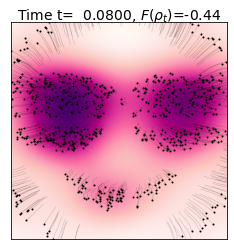

--------------------------------------------------------
Iter   W(ρ,ρ_t)  F(ρ)=ℱ*(ρ)     ‖X‖   ‖T(X)‖    ‖ΔT(X)‖
--------------------------------------------------------
   0   2.72e-03    -2.00e+00     0.73     0.73   3.44e-02
 100   1.13e-03    -2.00e+00     0.73     0.73   1.78e-04
tensor(1.0597e-15, dtype=torch.float64) tensor(0.1167, dtype=torch.float64)

---> After JKO Step: 9, F(ρ)=-5.3232e-01 <---



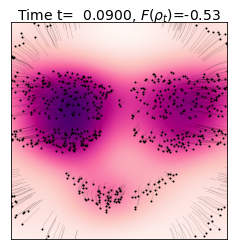

--------------------------------------------------------
Iter   W(ρ,ρ_t)  F(ρ)=ℱ*(ρ)     ‖X‖   ‖T(X)‖    ‖ΔT(X)‖
--------------------------------------------------------
   0   1.79e-03    -2.00e+00     0.73     0.73   3.12e-02
 100   9.08e-04    -2.00e+00     0.73     0.73   2.30e-04
tensor(1.0526e-15, dtype=torch.float64) tensor(0.1330, dtype=torch.float64)

---> After JKO Step: 10, F(ρ)=-6.1619e-01 <---



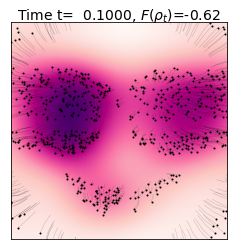

--------------------------------------------------------
Iter   W(ρ,ρ_t)  F(ρ)=ℱ*(ρ)     ‖X‖   ‖T(X)‖    ‖ΔT(X)‖
--------------------------------------------------------
   0   1.01e-03    -2.00e+00     0.73     0.73   2.87e-02
 100   7.91e-04    -2.00e+00     0.73     0.73   2.06e-04
tensor(1.1451e-15, dtype=torch.float64) tensor(0.1774, dtype=torch.float64)

---> After JKO Step: 11, F(ρ)=-6.6784e-01 <---



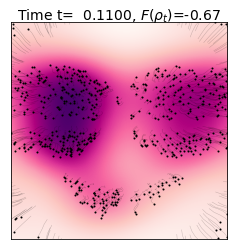

--------------------------------------------------------
Iter   W(ρ,ρ_t)  F(ρ)=ℱ*(ρ)     ‖X‖   ‖T(X)‖    ‖ΔT(X)‖
--------------------------------------------------------
   0   8.20e-04    -2.00e+00     0.73     0.73   2.70e-02
 100   7.56e-04    -2.00e+00     0.73     0.73   2.74e-04
tensor(1.1497e-15, dtype=torch.float64) tensor(0.3415, dtype=torch.float64)

---> After JKO Step: 12, F(ρ)=-7.1566e-01 <---



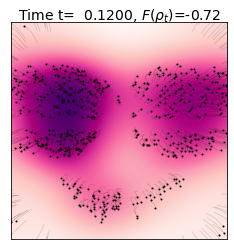

--------------------------------------------------------
Iter   W(ρ,ρ_t)  F(ρ)=ℱ*(ρ)     ‖X‖   ‖T(X)‖    ‖ΔT(X)‖
--------------------------------------------------------
   0   7.59e-04    -2.00e+00     0.73     0.73   2.50e-02
 100   7.44e-04    -2.00e+00     0.73     0.73   2.82e-04
tensor(1.0854e-15, dtype=torch.float64) tensor(0.5982, dtype=torch.float64)

---> After JKO Step: 13, F(ρ)=-7.6623e-01 <---



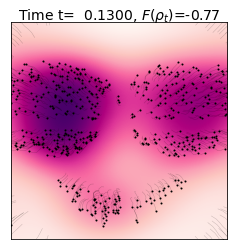

--------------------------------------------------------
Iter   W(ρ,ρ_t)  F(ρ)=ℱ*(ρ)     ‖X‖   ‖T(X)‖    ‖ΔT(X)‖
--------------------------------------------------------
   0   7.56e-04    -2.00e+00     0.73     0.73   2.52e-02
 100   6.92e-04    -2.00e+00     0.73     0.73   1.38e-04
tensor(1.1165e-15, dtype=torch.float64) tensor(0.1539, dtype=torch.float64)

---> After JKO Step: 14, F(ρ)=-8.3535e-01 <---



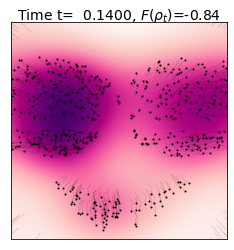

--------------------------------------------------------
Iter   W(ρ,ρ_t)  F(ρ)=ℱ*(ρ)     ‖X‖   ‖T(X)‖    ‖ΔT(X)‖
--------------------------------------------------------
   0   7.35e-04    -2.00e+00     0.73     0.73   2.49e-02
 100   6.47e-04    -2.00e+00     0.73     0.73   2.45e-04
tensor(9.7652e-16, dtype=torch.float64) tensor(0.1660, dtype=torch.float64)

---> After JKO Step: 15, F(ρ)=-9.0649e-01 <---



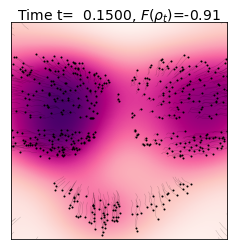

--------------------------------------------------------
Iter   W(ρ,ρ_t)  F(ρ)=ℱ*(ρ)     ‖X‖   ‖T(X)‖    ‖ΔT(X)‖
--------------------------------------------------------
   0   7.44e-04    -2.00e+00     0.73     0.73   2.57e-02
 100   7.26e-04    -2.00e+00     0.73     0.73   2.81e-04
tensor(1.0563e-15, dtype=torch.float64) tensor(0.1761, dtype=torch.float64)

---> After JKO Step: 16, F(ρ)=-9.4212e-01 <---



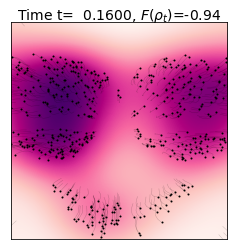

--------------------------------------------------------
Iter   W(ρ,ρ_t)  F(ρ)=ℱ*(ρ)     ‖X‖   ‖T(X)‖    ‖ΔT(X)‖
--------------------------------------------------------
   0   9.97e-04    -2.00e+00     0.73     0.73   2.63e-02
 100   6.08e-04    -2.00e+00     0.73     0.73   2.24e-04
tensor(1.1435e-15, dtype=torch.float64) tensor(0.1453, dtype=torch.float64)

---> After JKO Step: 17, F(ρ)=-9.7945e-01 <---



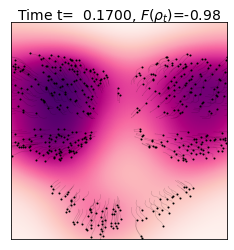

--------------------------------------------------------
Iter   W(ρ,ρ_t)  F(ρ)=ℱ*(ρ)     ‖X‖   ‖T(X)‖    ‖ΔT(X)‖
--------------------------------------------------------
   0   9.12e-04    -2.00e+00     0.73     0.73   2.32e-02


In [ ]:
import importlib
import src.flow
import src.utils
import src.functionals
importlib.reload(src.flow)
importlib.reload(src.functionals)
importlib.reload(src.utils)
importlib.reload(src.callbacks)


from src.utils import meshgrid_from
from src.flow import GradFlow
from src.functionals import EntropyFunctional
from src.callbacks import PlottingCallback
from src.icnn import FICNN

F = EntropyFunctional(ρ0=ρ0)
fname = 'HeatEq'

save_path = None
#save_path = os.path.join(outdir, img_name + '_' + fname)


cb1 = PlottingCallback(animate=False, display_freq=1, same_fig=False,
                       show_density=True,  figsize=(4,4), 
                       density_cmap=plt.cm.RdPu,
                       density_method='kde',
                       save_path=save_path
                       )

gf = GradFlow(X0, F=F, callbacks=cb1, τ=1e-2, lr = 1e-3, opt_iters=100, convex_net = factory, save_path=save_path)

XT = gf.flow(steps=40)

In [ ]:
from IPython.display import HTML

HTML(cb1.animation.to_html5_video())

### Potential Only

No rdkit
tsnecuda not found - will use (slower) cpu implementation


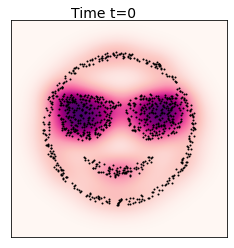

------------------------------------------------------
Iter   W(ρ,ρ_t) F(ρ)=𝒱(ρ)     ‖X‖   ‖T(X)‖    ‖ΔT(X)‖
------------------------------------------------------
   0   2.75e-02   4.36e-01     0.72     0.80   1.57e-01
 100   3.14e-04   2.99e-01     0.72     0.72   7.17e-04
 200   2.20e-04   2.99e-01     0.72     0.72   2.31e-04
 300   1.72e-04   2.99e-01     0.72     0.72   1.91e-04
 400   1.46e-04   2.99e-01     0.72     0.72   1.23e-04
 500   1.37e-04   2.99e-01     0.72     0.72   5.38e-05
 600   1.34e-04   2.99e-01     0.72     0.72   1.46e-04
 700   1.24e-04   2.99e-01     0.72     0.72   4.89e-04
 800   1.10e-04   3.00e-01     0.72     0.72   2.08e-03
 900   1.22e-04   2.99e-01     0.72     0.72   3.88e-04
1000   1.22e-04   2.99e-01     0.72     0.72   3.35e-04

---> After JKO Step: 1, F(ρ)=2.9857e-01 <---

------------------------------------------------------
Iter   W(ρ,ρ_t) F(ρ)=𝒱(ρ)     ‖X‖   ‖T(X)‖    ‖ΔT(X)‖
------------------------------------------------------
   0   1.

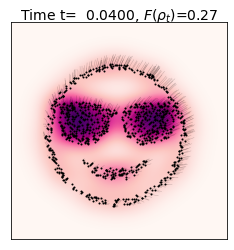

------------------------------------------------------
Iter   W(ρ,ρ_t) F(ρ)=𝒱(ρ)     ‖X‖   ‖T(X)‖    ‖ΔT(X)‖
------------------------------------------------------
   0   1.01e-04   2.55e-01     0.69     0.68   9.34e-03
 100   9.60e-05   2.55e-01     0.69     0.68   3.06e-05
 200   1.02e-04   2.55e-01     0.69     0.68   3.07e-06
 300   1.02e-04   2.55e-01     0.69     0.68   3.89e-06
 400   1.02e-04   2.55e-01     0.69     0.68   1.50e-06
 500   1.02e-04   2.55e-01     0.69     0.68   2.17e-06
 600   1.02e-04   2.55e-01     0.69     0.68   3.44e-07
 700   1.02e-04   2.55e-01     0.69     0.68   1.11e-06
 800   1.02e-04   2.55e-01     0.69     0.68   2.19e-07
 900   1.02e-04   2.55e-01     0.69     0.68   6.95e-07
1000   1.06e-04   2.55e-01     0.69     0.68   6.60e-03

---> After JKO Step: 5, F(ρ)=2.5478e-01 <---

------------------------------------------------------
Iter   W(ρ,ρ_t) F(ρ)=𝒱(ρ)     ‖X‖   ‖T(X)‖    ‖ΔT(X)‖
------------------------------------------------------
   0   9.

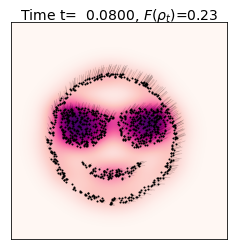

------------------------------------------------------
Iter   W(ρ,ρ_t) F(ρ)=𝒱(ρ)     ‖X‖   ‖T(X)‖    ‖ΔT(X)‖
------------------------------------------------------
   0   8.64e-05   2.17e-01     0.66     0.65   8.62e-03
 100   9.05e-05   2.17e-01     0.66     0.65   6.41e-05
 200   8.71e-05   2.17e-01     0.66     0.65   1.75e-06
 300   8.70e-05   2.17e-01     0.66     0.65   4.88e-07
 400   8.70e-05   2.17e-01     0.66     0.65   2.83e-07
 500   8.70e-05   2.17e-01     0.66     0.65   2.92e-07
 600   8.70e-05   2.17e-01     0.66     0.65   4.27e-07
 700   8.70e-05   2.17e-01     0.66     0.65   2.53e-07
 800   8.70e-05   2.17e-01     0.66     0.65   1.59e-06
 900   8.70e-05   2.17e-01     0.66     0.65   1.32e-06
1000   8.70e-05   2.17e-01     0.66     0.65   1.75e-07

---> After JKO Step: 9, F(ρ)=2.1741e-01 <---

------------------------------------------------------
Iter   W(ρ,ρ_t) F(ρ)=𝒱(ρ)     ‖X‖   ‖T(X)‖    ‖ΔT(X)‖
------------------------------------------------------
   0   8.

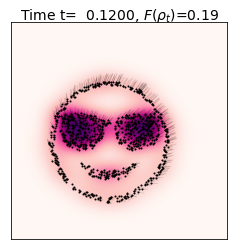

------------------------------------------------------
Iter   W(ρ,ρ_t) F(ρ)=𝒱(ρ)     ‖X‖   ‖T(X)‖    ‖ΔT(X)‖
------------------------------------------------------
   0   7.40e-05   1.86e-01     0.63     0.62   7.97e-03
 100   7.51e-05   1.86e-01     0.63     0.62   1.50e-04
 200   7.42e-05   1.86e-01     0.63     0.62   1.23e-06
 300   7.42e-05   1.86e-01     0.63     0.62   2.94e-07
 400   7.42e-05   1.86e-01     0.63     0.62   1.10e-07
 500   7.42e-05   1.86e-01     0.63     0.62   8.66e-08
 600   7.42e-05   1.86e-01     0.63     0.62   3.07e-07
 700   7.42e-05   1.86e-01     0.63     0.62   5.56e-08
 800   7.42e-05   1.86e-01     0.63     0.62   4.38e-08
 900   7.42e-05   1.86e-01     0.63     0.62   3.19e-07
1000   7.69e-05   1.85e-01     0.63     0.62   1.50e-04

---> After JKO Step: 13, F(ρ)=1.8576e-01 <---

------------------------------------------------------
Iter   W(ρ,ρ_t) F(ρ)=𝒱(ρ)     ‖X‖   ‖T(X)‖    ‖ΔT(X)‖
------------------------------------------------------
   0   6

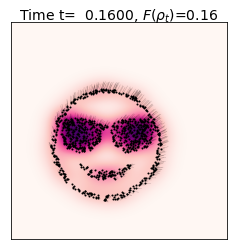

------------------------------------------------------
Iter   W(ρ,ρ_t) F(ρ)=𝒱(ρ)     ‖X‖   ‖T(X)‖    ‖ΔT(X)‖
------------------------------------------------------
   0   6.34e-05   1.59e-01     0.60     0.60   7.38e-03
 100   6.08e-05   1.59e-01     0.60     0.60   1.34e-04
 200   6.34e-05   1.59e-01     0.60     0.60   6.94e-07
 300   6.34e-05   1.59e-01     0.60     0.60   9.08e-08
 400   6.34e-05   1.59e-01     0.60     0.60   5.47e-08
 500   6.34e-05   1.59e-01     0.60     0.60   3.77e-08
 600   6.34e-05   1.59e-01     0.60     0.60   2.57e-08
 700   6.34e-05   1.59e-01     0.60     0.60   2.05e-08
 800   6.34e-05   1.59e-01     0.60     0.60   1.55e-08
 900   6.34e-05   1.59e-01     0.60     0.60   3.11e-07
1000   6.34e-05   1.59e-01     0.60     0.60   1.33e-07

---> After JKO Step: 17, F(ρ)=1.5855e-01 <---

------------------------------------------------------
Iter   W(ρ,ρ_t) F(ρ)=𝒱(ρ)     ‖X‖   ‖T(X)‖    ‖ΔT(X)‖
------------------------------------------------------
   0   6

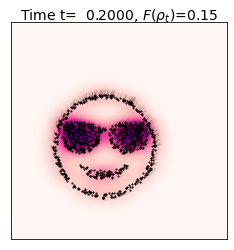

------------------------------------------------------
Iter   W(ρ,ρ_t) F(ρ)=𝒱(ρ)     ‖X‖   ‖T(X)‖    ‖ΔT(X)‖
------------------------------------------------------
   0   1.47e-05   1.45e-01     0.59     0.59   3.53e-03
 100   5.80e-05   1.40e-01     0.59     0.58   9.09e-05
 200   5.62e-05   1.41e-01     0.59     0.58   1.08e-06
 300   5.62e-05   1.41e-01     0.59     0.58   1.10e-07
 400   5.62e-05   1.41e-01     0.59     0.58   2.94e-08
 500   5.62e-05   1.41e-01     0.59     0.58   2.71e-08
 600   5.62e-05   1.41e-01     0.59     0.58   1.52e-06
 700   5.65e-05   1.41e-01     0.59     0.58   1.09e-04
 800   5.62e-05   1.41e-01     0.59     0.58   7.24e-07
 900   5.48e-05   1.41e-01     0.59     0.58   1.87e-03
1000   5.63e-05   1.41e-01     0.59     0.58   2.17e-05

---> After JKO Step: 21, F(ρ)=1.4055e-01 <---

------------------------------------------------------
Iter   W(ρ,ρ_t) F(ρ)=𝒱(ρ)     ‖X‖   ‖T(X)‖    ‖ΔT(X)‖
------------------------------------------------------
   0   5

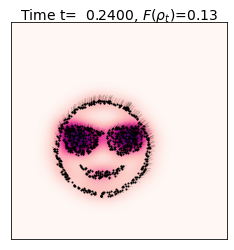

------------------------------------------------------
Iter   W(ρ,ρ_t) F(ρ)=𝒱(ρ)     ‖X‖   ‖T(X)‖    ‖ΔT(X)‖
------------------------------------------------------
   0   4.91e-05   1.23e-01     0.57     0.56   6.50e-03
 100   4.84e-05   1.23e-01     0.57     0.56   1.43e-04
 200   4.91e-05   1.23e-01     0.57     0.56   9.45e-07
 300   4.91e-05   1.23e-01     0.57     0.56   1.36e-07
 400   4.91e-05   1.23e-01     0.57     0.56   1.81e-07
 500   5.04e-05   1.23e-01     0.57     0.56   2.11e-03
 600   4.91e-05   1.23e-01     0.57     0.56   1.46e-05
 700   4.92e-05   1.23e-01     0.57     0.56   1.18e-03
 800   4.91e-05   1.23e-01     0.57     0.56   4.52e-06
 900   4.91e-05   1.23e-01     0.57     0.56   2.36e-04
1000   4.91e-05   1.23e-01     0.57     0.56   2.48e-05

---> After JKO Step: 25, F(ρ)=1.2270e-01 <---

------------------------------------------------------
Iter   W(ρ,ρ_t) F(ρ)=𝒱(ρ)     ‖X‖   ‖T(X)‖    ‖ΔT(X)‖
------------------------------------------------------
   0   4

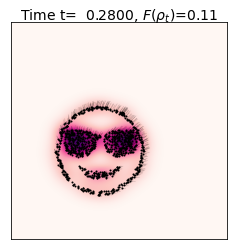

------------------------------------------------------
Iter   W(ρ,ρ_t) F(ρ)=𝒱(ρ)     ‖X‖   ‖T(X)‖    ‖ΔT(X)‖
------------------------------------------------------
   0   4.18e-05   1.05e-01     0.55     0.54   6.00e-03
 100   4.23e-05   1.05e-01     0.55     0.54   9.98e-05
 200   4.19e-05   1.05e-01     0.55     0.54   6.07e-07
 300   4.19e-05   1.05e-01     0.55     0.54   8.20e-08
 400   4.19e-05   1.05e-01     0.55     0.54   2.57e-08
 500   4.19e-05   1.05e-01     0.55     0.54   1.27e-08
 600   4.19e-05   1.05e-01     0.55     0.54   8.29e-09
 700   4.19e-05   1.05e-01     0.55     0.54   6.34e-09
 800   4.19e-05   1.05e-01     0.55     0.54   5.02e-09
 900   4.19e-05   1.05e-01     0.55     0.54   2.12e-06
1000   4.28e-05   1.05e-01     0.55     0.54   1.30e-04

---> After JKO Step: 29, F(ρ)=1.0478e-01 <---

------------------------------------------------------
Iter   W(ρ,ρ_t) F(ρ)=𝒱(ρ)     ‖X‖   ‖T(X)‖    ‖ΔT(X)‖
------------------------------------------------------
   0   3

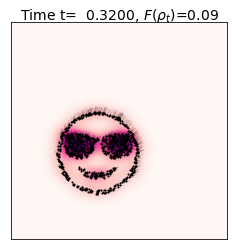

------------------------------------------------------
Iter   W(ρ,ρ_t) F(ρ)=𝒱(ρ)     ‖X‖   ‖T(X)‖    ‖ΔT(X)‖
------------------------------------------------------
   0   3.58e-05   8.94e-02     0.53     0.52   5.55e-03
 100   3.53e-05   8.94e-02     0.53     0.52   1.11e-04
 200   3.58e-05   8.94e-02     0.53     0.52   4.03e-07
 300   3.58e-05   8.94e-02     0.53     0.52   1.24e-07
 400   3.58e-05   8.94e-02     0.53     0.52   5.89e-08
 500   3.58e-05   8.94e-02     0.53     0.52   2.59e-08
 600   3.58e-05   8.94e-02     0.53     0.52   1.19e-08
 700   3.58e-05   8.94e-02     0.53     0.52   7.95e-09
 800   3.58e-05   8.94e-02     0.53     0.52   7.27e-09
 900   3.58e-05   8.94e-02     0.53     0.52   7.28e-09
1000   3.57e-05   8.94e-02     0.53     0.52   8.86e-06

---> After JKO Step: 33, F(ρ)=8.9383e-02 <---

------------------------------------------------------
Iter   W(ρ,ρ_t) F(ρ)=𝒱(ρ)     ‖X‖   ‖T(X)‖    ‖ΔT(X)‖
------------------------------------------------------
   0   3

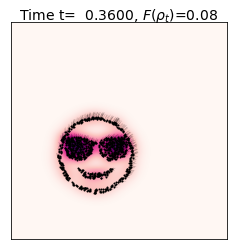

------------------------------------------------------
Iter   W(ρ,ρ_t) F(ρ)=𝒱(ρ)     ‖X‖   ‖T(X)‖    ‖ΔT(X)‖
------------------------------------------------------
   0   3.05e-05   7.63e-02     0.51     0.50   5.13e-03
 100   2.88e-05   7.64e-02     0.51     0.50   3.31e-05
 200   3.05e-05   7.63e-02     0.51     0.50   8.44e-07
 300   3.05e-05   7.63e-02     0.51     0.50   1.02e-07
 400   3.05e-05   7.63e-02     0.51     0.50   4.34e-08
 500   3.05e-05   7.63e-02     0.51     0.50   1.95e-08
 600   3.06e-05   7.63e-02     0.51     0.50   3.78e-04
 700   3.05e-05   7.63e-02     0.51     0.50   1.06e-05
 800   3.05e-05   7.63e-02     0.51     0.50   5.13e-07
 900   3.05e-05   7.63e-02     0.51     0.50   1.89e-04
1000   3.05e-05   7.63e-02     0.51     0.50   2.12e-07

---> After JKO Step: 37, F(ρ)=7.6287e-02 <---

------------------------------------------------------
Iter   W(ρ,ρ_t) F(ρ)=𝒱(ρ)     ‖X‖   ‖T(X)‖    ‖ΔT(X)‖
------------------------------------------------------
   0   2

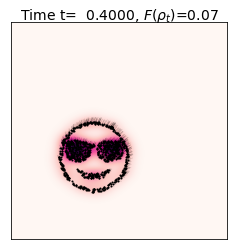

In [44]:
import importlib
import src.flow
import src.utils
import src.functionals
importlib.reload(src.flow)
importlib.reload(src.functionals)
importlib.reload(src.utils)
importlib.reload(src.callbacks)


from src.utils import meshgrid_from
from src.flow import GradFlow
from src.functionals import EntropyFunctional, InternalEnergyFunctional,FunctionalSum, PotentialFunctional
from src.callbacks import PlottingCallback


V = lambda x: torch.norm(x-0.2,dim=1)**2
F = PotentialFunctional(V)

fname = 'Pot'

save_path = None
save_path = os.path.join(outdir, img_name + '_' + fname)


cb1 = PlottingCallback(animate=False, display_freq=4, same_fig=False,
                       show_density=True,  figsize=(4,4), 
                       density_cmap=plt.cm.RdPu,
                       density_method='kde',
                       save_path=save_path
                      )


gf = GradFlow(X0, F=F, callbacks=cb1, τ=1e-2, lr = 1e-3, opt_iters=1000, animate=True, save_path = save_path)

XT = gf.flow(steps=40)

### (Linear) Fokker Planck

No rdkit
tsnecuda not found - will use (slower) cpu implementation
No rdkit
tsnecuda not found - will use (slower) cpu implementation


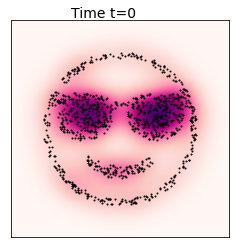

--------------------------------------------------------------------------
Iter   W(ρ,ρ_t)  F(ρ)=        ℱ*(ρ)   +  𝒱(ρ)     ‖X‖   ‖T(X)‖    ‖ΔT(X)‖
--------------------------------------------------------------------------
   0   1.18e-02    -0.16   -2.00e+00  2.39e-01     0.72     0.67   1.01e-01
 100   2.01e-04    -0.10   -2.00e+00  3.04e-01     0.72     0.72   2.48e-04
 200   1.54e-04    -0.10   -2.00e+00  3.04e-01     0.72     0.72   2.07e-04
 300   2.06e-04    -0.10   -2.00e+00  3.03e-01     0.72     0.71   1.47e-03
 400   1.71e-04    -0.10   -2.00e+00  3.03e-01     0.72     0.71   1.73e-03
 500   1.11e-04    -0.10   -2.00e+00  3.05e-01     0.72     0.72   2.13e-03
 600   1.26e-04    -0.10   -2.00e+00  3.03e-01     0.72     0.72   8.11e-04
 700   1.19e-04    -0.10   -2.00e+00  3.04e-01     0.72     0.71   1.11e-03
 800   1.08e-04    -0.10   -2.00e+00  3.04e-01     0.72     0.72   4.14e-04
 900   1.01e-04    -0.10   -2.00e+00  3.04e-01     0.72     0.72   3.09e-04
1000   1.03e-04 

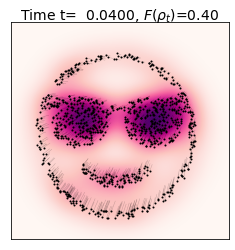

--------------------------------------------------------------------------
Iter   W(ρ,ρ_t)  F(ρ)=        ℱ*(ρ)   +  𝒱(ρ)     ‖X‖   ‖T(X)‖    ‖ΔT(X)‖
--------------------------------------------------------------------------
   0   9.33e-05    -0.11   -2.00e+00  2.89e-01     0.69     0.68   8.99e-03
 100   8.25e-05    -0.11   -2.00e+00  2.89e-01     0.69     0.68   1.83e-04
 200   8.14e-05    -0.11   -2.00e+00  2.89e-01     0.69     0.68   4.24e-05
 300   8.04e-05    -0.11   -2.00e+00  2.89e-01     0.69     0.68   3.58e-05
 400   8.14e-05    -0.11   -2.00e+00  2.89e-01     0.69     0.68   4.38e-05
 500   8.23e-05    -0.11   -2.00e+00  2.89e-01     0.69     0.68   5.74e-05
 600   8.14e-05    -0.11   -2.00e+00  2.89e-01     0.69     0.68   1.16e-04
 700   8.19e-05    -0.11   -2.00e+00  2.89e-01     0.69     0.68   1.20e-04
 800   8.15e-05    -0.11   -2.00e+00  2.89e-01     0.69     0.68   5.44e-05
 900   8.27e-05    -0.11   -2.00e+00  2.89e-01     0.69     0.68   8.20e-05
1000   8.55e-05 

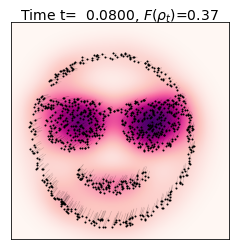

--------------------------------------------------------------------------
Iter   W(ρ,ρ_t)  F(ρ)=        ℱ*(ρ)   +  𝒱(ρ)     ‖X‖   ‖T(X)‖    ‖ΔT(X)‖
--------------------------------------------------------------------------
   0   1.04e-04    -0.12   -2.00e+00  2.76e-01     0.66     0.65   8.58e-03
 100   7.85e-05    -0.12   -2.00e+00  2.76e-01     0.66     0.65   2.33e-04
 200   7.42e-05    -0.12   -2.00e+00  2.76e-01     0.66     0.65   2.97e-04
 300   8.29e-05    -0.12   -2.00e+00  2.75e-01     0.66     0.65   1.25e-03
 400   8.55e-05    -0.12   -2.00e+00  2.75e-01     0.66     0.65   1.61e-03
 500   8.83e-05    -0.13   -2.00e+00  2.75e-01     0.66     0.65   3.41e-03
 600   6.41e-05    -0.12   -2.00e+00  2.76e-01     0.66     0.65   3.92e-04
 700   8.03e-05    -0.13   -2.00e+00  2.75e-01     0.66     0.65   1.64e-03
 800   8.67e-05    -0.13   -2.00e+00  2.74e-01     0.66     0.65   2.76e-03
 900   5.68e-05    -0.12   -2.00e+00  2.76e-01     0.66     0.65   1.09e-03
1000   1.24e-04 

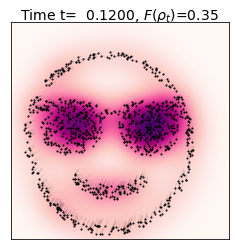

--------------------------------------------------------------------------
Iter   W(ρ,ρ_t)  F(ρ)=        ℱ*(ρ)   +  𝒱(ρ)     ‖X‖   ‖T(X)‖    ‖ΔT(X)‖
--------------------------------------------------------------------------
   0   7.53e-05    -0.13   -2.00e+00  2.68e-01     0.63     0.63   7.74e-03
 100   5.27e-05    -0.13   -2.00e+00  2.68e-01     0.63     0.63   5.52e-05
 200   5.55e-05    -0.13   -2.00e+00  2.67e-01     0.63     0.63   5.46e-05
 300   5.52e-05    -0.13   -2.00e+00  2.67e-01     0.63     0.63   4.08e-05
 400   5.44e-05    -0.13   -2.00e+00  2.67e-01     0.63     0.63   3.49e-05
 500   5.56e-05    -0.13   -2.00e+00  2.67e-01     0.63     0.63   6.20e-05
 600   5.57e-05    -0.13   -2.00e+00  2.67e-01     0.63     0.63   7.38e-05
 700   5.63e-05    -0.13   -2.00e+00  2.67e-01     0.63     0.63   7.19e-05
 800   5.48e-05    -0.13   -2.00e+00  2.67e-01     0.63     0.63   1.21e-04
 900   5.52e-05    -0.13   -2.00e+00  2.67e-01     0.63     0.63   1.08e-04
1000   5.59e-05 

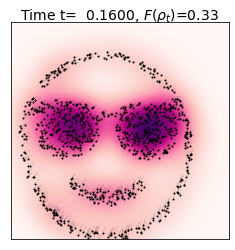

--------------------------------------------------------------------------
Iter   W(ρ,ρ_t)  F(ρ)=        ℱ*(ρ)   +  𝒱(ρ)     ‖X‖   ‖T(X)‖    ‖ΔT(X)‖
--------------------------------------------------------------------------
   0   4.66e-05    -0.14   -2.00e+00  2.58e-01     0.61     0.60   6.58e-03
 100   5.25e-05    -0.14   -2.00e+00  2.58e-01     0.61     0.60   1.09e-04
 200   4.64e-05    -0.14   -2.00e+00  2.58e-01     0.61     0.60   3.16e-05
 300   4.57e-05    -0.14   -2.00e+00  2.58e-01     0.61     0.60   6.47e-05
 400   4.55e-05    -0.14   -2.00e+00  2.58e-01     0.61     0.60   7.89e-05
 500   4.58e-05    -0.14   -2.00e+00  2.58e-01     0.61     0.60   5.40e-05
 600   4.55e-05    -0.14   -2.00e+00  2.58e-01     0.61     0.60   9.12e-05
 700   4.72e-05    -0.14   -2.00e+00  2.58e-01     0.61     0.60   1.39e-04
 800   4.68e-05    -0.14   -2.00e+00  2.58e-01     0.61     0.60   1.45e-04
 900   4.64e-05    -0.14   -2.00e+00  2.58e-01     0.61     0.60   9.31e-05
1000   4.51e-05 

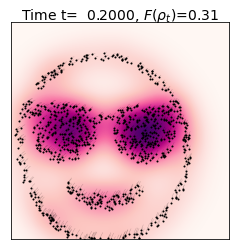

--------------------------------------------------------------------------
Iter   W(ρ,ρ_t)  F(ρ)=        ℱ*(ρ)   +  𝒱(ρ)     ‖X‖   ‖T(X)‖    ‖ΔT(X)‖
--------------------------------------------------------------------------
   0   3.77e-05    -0.15   -2.00e+00  2.48e-01     0.58     0.58   5.97e-03
 100   3.78e-05    -0.15   -2.00e+00  2.48e-01     0.58     0.58   1.93e-04
 200   3.79e-05    -0.15   -2.00e+00  2.48e-01     0.58     0.58   3.84e-05
 300   3.76e-05    -0.15   -2.00e+00  2.48e-01     0.58     0.58   8.53e-05
 400   3.78e-05    -0.15   -2.00e+00  2.48e-01     0.58     0.58   9.26e-05
 500   3.88e-05    -0.15   -2.00e+00  2.48e-01     0.58     0.58   1.28e-04
 600   3.90e-05    -0.15   -2.00e+00  2.48e-01     0.58     0.58   3.99e-05
 700   3.86e-05    -0.15   -2.00e+00  2.48e-01     0.58     0.58   1.35e-04
 800   3.71e-05    -0.15   -2.00e+00  2.48e-01     0.58     0.58   1.60e-04
 900   3.67e-05    -0.15   -2.00e+00  2.48e-01     0.58     0.58   2.58e-04
1000   3.82e-05 

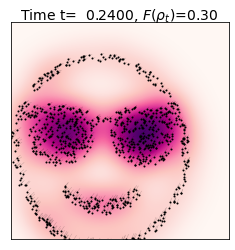

--------------------------------------------------------------------------
Iter   W(ρ,ρ_t)  F(ρ)=        ℱ*(ρ)   +  𝒱(ρ)     ‖X‖   ‖T(X)‖    ‖ΔT(X)‖
--------------------------------------------------------------------------
   0   3.99e-05    -0.16   -2.00e+00  2.40e-01     0.56     0.55   6.06e-03
 100   2.92e-05    -0.16   -2.00e+00  2.41e-01     0.56     0.55   7.15e-05
 200   3.23e-05    -0.16   -2.00e+00  2.40e-01     0.56     0.55   5.66e-05
 300   3.21e-05    -0.16   -2.00e+00  2.40e-01     0.56     0.55   5.72e-05
 400   3.22e-05    -0.16   -2.00e+00  2.40e-01     0.56     0.55   1.79e-04
 500   3.21e-05    -0.16   -2.00e+00  2.40e-01     0.56     0.55   5.23e-05
 600   3.17e-05    -0.16   -2.00e+00  2.40e-01     0.56     0.55   6.73e-05
 700   3.18e-05    -0.16   -2.00e+00  2.40e-01     0.56     0.55   4.37e-05
 800   3.20e-05    -0.16   -2.00e+00  2.40e-01     0.56     0.55   4.68e-05
 900   3.23e-05    -0.16   -2.00e+00  2.40e-01     0.56     0.55   7.92e-05
1000   3.28e-05 

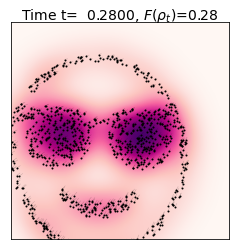

--------------------------------------------------------------------------
Iter   W(ρ,ρ_t)  F(ρ)=        ℱ*(ρ)   +  𝒱(ρ)     ‖X‖   ‖T(X)‖    ‖ΔT(X)‖
--------------------------------------------------------------------------
   0   2.92e-05    -0.17   -2.00e+00  2.34e-01     0.54     0.53   5.24e-03
 100   2.63e-05    -0.17   -2.00e+00  2.34e-01     0.54     0.53   2.59e-04
 200   2.62e-05    -0.17   -2.00e+00  2.34e-01     0.54     0.53   9.66e-05
 300   2.94e-05    -0.17   -2.00e+00  2.34e-01     0.54     0.53   3.99e-04
 400   3.40e-05    -0.17   -2.00e+00  2.34e-01     0.54     0.53   2.44e-04
 500   3.68e-05    -0.17   -2.00e+00  2.34e-01     0.54     0.53   6.46e-04
 600   3.77e-05    -0.17   -2.00e+00  2.34e-01     0.54     0.53   7.41e-04
 700   3.66e-05    -0.17   -2.00e+00  2.34e-01     0.54     0.53   5.38e-04
 800   2.89e-05    -0.17   -2.00e+00  2.35e-01     0.54     0.53   1.45e-03
 900   3.62e-05    -0.17   -2.00e+00  2.34e-01     0.54     0.53   1.62e-03
1000   2.20e-05 

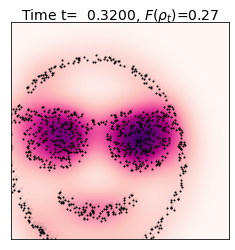

--------------------------------------------------------------------------
Iter   W(ρ,ρ_t)  F(ρ)=        ℱ*(ρ)   +  𝒱(ρ)     ‖X‖   ‖T(X)‖    ‖ΔT(X)‖
--------------------------------------------------------------------------
   0   2.76e-05    -0.17   -2.00e+00  2.30e-01     0.52     0.51   4.96e-03
 100   2.19e-05    -0.17   -2.00e+00  2.30e-01     0.52     0.51   1.94e-04
 200   2.18e-05    -0.17   -2.00e+00  2.30e-01     0.52     0.51   1.57e-04
 300   2.43e-05    -0.17   -2.00e+00  2.30e-01     0.52     0.51   1.96e-04
 400   2.35e-05    -0.17   -2.00e+00  2.30e-01     0.52     0.51   6.61e-05
 500   2.40e-05    -0.17   -2.00e+00  2.30e-01     0.52     0.51   7.16e-05
 600   2.27e-05    -0.17   -2.00e+00  2.30e-01     0.52     0.51   2.39e-04
 700   2.25e-05    -0.17   -2.00e+00  2.30e-01     0.52     0.51   2.60e-04
 800   2.26e-05    -0.17   -2.00e+00  2.30e-01     0.52     0.51   1.84e-04
 900   2.33e-05    -0.17   -2.00e+00  2.30e-01     0.52     0.51   6.37e-04
1000   2.46e-05 

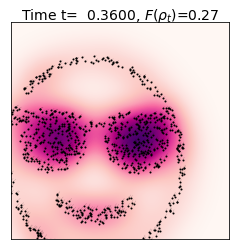

--------------------------------------------------------------------------
Iter   W(ρ,ρ_t)  F(ρ)=        ℱ*(ρ)   +  𝒱(ρ)     ‖X‖   ‖T(X)‖    ‖ΔT(X)‖
--------------------------------------------------------------------------
   0   2.50e-05    -0.17   -2.00e+00  2.26e-01     0.50     0.50   4.69e-03
 100   1.89e-05    -0.17   -2.00e+00  2.26e-01     0.50     0.50   1.41e-04
 200   1.91e-05    -0.17   -2.00e+00  2.26e-01     0.50     0.50   4.88e-05
 300   1.88e-05    -0.17   -2.00e+00  2.26e-01     0.50     0.50   4.84e-05
 400   1.91e-05    -0.17   -2.00e+00  2.26e-01     0.50     0.50   1.17e-04
 500   1.85e-05    -0.17   -2.00e+00  2.26e-01     0.50     0.50   1.99e-04
 600   1.92e-05    -0.17   -2.00e+00  2.26e-01     0.50     0.50   1.12e-04
 700   1.92e-05    -0.17   -2.00e+00  2.26e-01     0.50     0.50   2.14e-04
 800   1.86e-05    -0.17   -2.00e+00  2.26e-01     0.50     0.50   5.26e-05
 900   2.05e-05    -0.17   -2.00e+00  2.26e-01     0.50     0.50   2.84e-04
1000   1.86e-05 

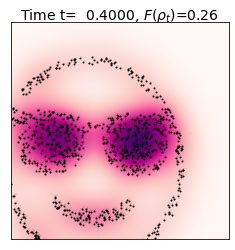

In [7]:
import importlib
import src.flow
import src.utils
import src.functionals
importlib.reload(src.flow)
importlib.reload(src.functionals)
importlib.reload(src.utils)
importlib.reload(src.callbacks)


from src.utils import meshgrid_from
from src.flow import GradFlow
from src.functionals import EntropyFunctional, InternalEnergyFunctional,FunctionalSum, PotentialFunctional
from src.callbacks import PlottingCallback


F1 = EntropyFunctional(ρ0=ρ0)

V = lambda x: torch.norm(x-0.2,dim=1)**2
F2 = PotentialFunctional(V)

F  = FunctionalSum([F1, F2], weights = [0.2, 1])


fname = 'FP_lin'

save_path = None
save_path = os.path.join(outdir, img_name + '_' + fname)


cb1 = PlottingCallback(animate=False, display_freq=4, same_fig=False,
                       show_density=True,  figsize=(4,4), 
                       density_cmap=plt.cm.RdPu,
                       density_method='kde',
                       save_path=save_path
                      )




gf = GradFlow(X0, F=F, callbacks=cb1, τ=1e-2, lr = 1e-3, opt_iters=1000, save_path = save_path)

XT = gf.flow(steps=40)

In [10]:
if '' is None: print('here')

### Non-Linear Fokker Planck

No rdkit
tsnecuda not found - will use (slower) cpu implementation


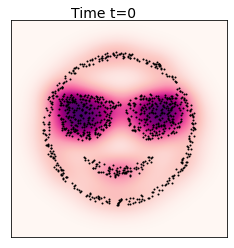

------------------------------------------------------------------------
Iter   W(ρ,ρ_t)  F(ρ)=       ℱ(ρ)   +  𝒱(ρ)     ‖X‖   ‖T(X)‖    ‖ΔT(X)‖
------------------------------------------------------------------------
   0   1.44e-01    -2.61    -14.21  2.34e-01     0.72     0.62   3.76e-01
 100   1.09e-03    -0.79     -5.54  3.19e-01     0.72     0.72   4.59e-04
 200   8.29e-04    -0.70     -5.10  3.18e-01     0.72     0.72   2.44e-04
 300   6.56e-04    -0.64     -4.81  3.17e-01     0.72     0.72   2.37e-04
 400   5.16e-04    -0.63     -4.74  3.16e-01     0.72     0.72   9.27e-05
 500   4.99e-04    -0.63     -4.72  3.17e-01     0.72     0.72   1.29e-04
 600   4.75e-04    -0.62     -4.68  3.16e-01     0.72     0.72   1.56e-04
 700   4.56e-04    -0.62     -4.68  3.16e-01     0.72     0.72   1.10e-04
 800   4.67e-04    -0.63     -4.73  3.16e-01     0.72     0.72   5.32e-04
 900   4.85e-04    -0.64     -4.77  3.17e-01     0.72     0.72   3.82e-04
1000   4.61e-04    -0.64     -4.76  3.17e-

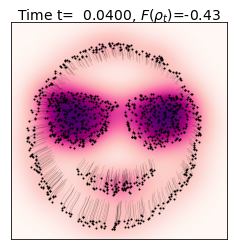

------------------------------------------------------------------------
Iter   W(ρ,ρ_t)  F(ρ)=       ℱ(ρ)   +  𝒱(ρ)     ‖X‖   ‖T(X)‖    ‖ΔT(X)‖
------------------------------------------------------------------------
   0   3.03e-04    -0.39     -3.60  3.33e-01     0.70     0.69   1.53e-02
 100   2.06e-04    -0.41     -3.70  3.32e-01     0.70     0.69   1.75e-04
 200   1.80e-04    -0.40     -3.65  3.32e-01     0.70     0.69   1.03e-04
 300   1.83e-04    -0.39     -3.63  3.31e-01     0.70     0.69   8.05e-05
 400   1.99e-04    -0.39     -3.62  3.31e-01     0.70     0.69   2.01e-04
 500   1.70e-04    -0.39     -3.61  3.32e-01     0.70     0.69   3.00e-04
 600   1.62e-04    -0.39     -3.63  3.32e-01     0.70     0.69   2.05e-04
 700   1.57e-04    -0.40     -3.64  3.32e-01     0.70     0.69   4.11e-04
 800   1.64e-04    -0.40     -3.64  3.32e-01     0.70     0.69   3.49e-04
 900   1.60e-04    -0.40     -3.64  3.32e-01     0.70     0.69   4.20e-04
1000   1.52e-04    -0.40     -3.64  3.32e-

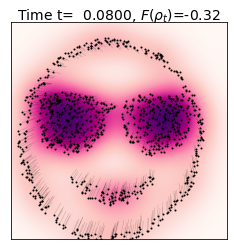

------------------------------------------------------------------------
Iter   W(ρ,ρ_t)  F(ρ)=       ℱ(ρ)   +  𝒱(ρ)     ‖X‖   ‖T(X)‖    ‖ΔT(X)‖
------------------------------------------------------------------------
   0   1.22e-04    -0.29     -3.13  3.32e-01     0.66     0.66   9.81e-03
 100   9.09e-05    -0.31     -3.18  3.31e-01     0.66     0.66   1.67e-04
 200   8.82e-05    -0.31     -3.18  3.31e-01     0.66     0.66   1.29e-04
 300   9.04e-05    -0.31     -3.18  3.31e-01     0.66     0.66   5.76e-05
 400   9.09e-05    -0.31     -3.18  3.31e-01     0.66     0.66   9.62e-05
 500   9.70e-05    -0.31     -3.18  3.31e-01     0.66     0.66   1.69e-04
 600   9.20e-05    -0.31     -3.18  3.31e-01     0.66     0.66   4.81e-05
 700   9.18e-05    -0.31     -3.18  3.31e-01     0.66     0.66   3.07e-04
 800   8.95e-05    -0.31     -3.19  3.30e-01     0.66     0.66   3.74e-04
 900   9.29e-05    -0.31     -3.18  3.31e-01     0.66     0.66   1.63e-04
1000   8.88e-05    -0.31     -3.19  3.30e-

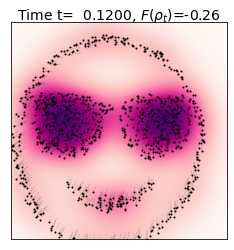

------------------------------------------------------------------------
Iter   W(ρ,ρ_t)  F(ρ)=       ℱ(ρ)   +  𝒱(ρ)     ‖X‖   ‖T(X)‖    ‖ΔT(X)‖
------------------------------------------------------------------------
   0   3.68e-05    -0.24     -2.90  3.36e-01     0.64     0.64   5.06e-03
 100   5.92e-05    -0.25     -2.93  3.32e-01     0.64     0.64   1.41e-04
 200   6.37e-05    -0.25     -2.93  3.32e-01     0.64     0.63   2.42e-05
 300   6.55e-05    -0.25     -2.92  3.32e-01     0.64     0.63   1.52e-04
 400   6.32e-05    -0.25     -2.93  3.32e-01     0.64     0.63   5.22e-05
 500   6.33e-05    -0.25     -2.93  3.32e-01     0.64     0.63   1.87e-04
 600   6.35e-05    -0.25     -2.93  3.32e-01     0.64     0.63   3.24e-04
 700   6.60e-05    -0.25     -2.92  3.32e-01     0.64     0.63   3.54e-04
 800   6.30e-05    -0.25     -2.93  3.32e-01     0.64     0.63   1.05e-04
 900   6.51e-05    -0.25     -2.92  3.32e-01     0.64     0.63   5.59e-04
1000   6.39e-05    -0.25     -2.92  3.32e-

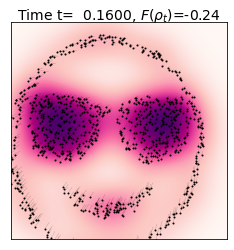

------------------------------------------------------------------------
Iter   W(ρ,ρ_t)  F(ρ)=       ℱ(ρ)   +  𝒱(ρ)     ‖X‖   ‖T(X)‖    ‖ΔT(X)‖
------------------------------------------------------------------------
   0   5.72e-05    -0.23     -2.76  3.25e-01     0.61     0.61   7.13e-03
 100   5.05e-05    -0.23     -2.78  3.24e-01     0.61     0.61   2.71e-04
 200   4.84e-05    -0.23     -2.79  3.24e-01     0.61     0.61   1.25e-04
 300   4.94e-05    -0.23     -2.78  3.25e-01     0.61     0.61   4.47e-05
 400   4.99e-05    -0.23     -2.80  3.25e-01     0.61     0.61   1.22e-04
 500   5.14e-05    -0.24     -2.81  3.25e-01     0.61     0.61   9.38e-05
 600   5.33e-05    -0.24     -2.81  3.25e-01     0.61     0.61   1.22e-04
 700   5.86e-05    -0.24     -2.80  3.24e-01     0.61     0.61   1.09e-04
 800   6.02e-05    -0.24     -2.80  3.24e-01     0.61     0.61   5.46e-04
 900   4.49e-05    -0.23     -2.78  3.25e-01     0.61     0.61   1.86e-03
1000   5.07e-05    -0.23     -2.78  3.24e-

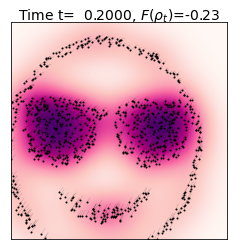

------------------------------------------------------------------------
Iter   W(ρ,ρ_t)  F(ρ)=       ℱ(ρ)   +  𝒱(ρ)     ‖X‖   ‖T(X)‖    ‖ΔT(X)‖
------------------------------------------------------------------------
   0   7.92e-05    -0.23     -2.69  3.12e-01     0.58     0.58   8.75e-03
 100   3.61e-05    -0.23     -2.69  3.14e-01     0.58     0.58   4.86e-05
 200   3.88e-05    -0.23     -2.70  3.13e-01     0.58     0.58   3.06e-05
 300   3.94e-05    -0.23     -2.70  3.13e-01     0.58     0.58   1.77e-05
 400   3.71e-05    -0.23     -2.70  3.13e-01     0.58     0.58   1.05e-04
 500   3.73e-05    -0.23     -2.70  3.13e-01     0.58     0.58   7.47e-05
 600   3.96e-05    -0.23     -2.69  3.13e-01     0.58     0.58   9.33e-05
 700   3.90e-05    -0.23     -2.70  3.13e-01     0.58     0.58   4.59e-05
 800   3.85e-05    -0.23     -2.70  3.13e-01     0.58     0.58   1.52e-04
 900   3.73e-05    -0.23     -2.70  3.13e-01     0.58     0.58   1.70e-04
1000   4.12e-05    -0.23     -2.69  3.13e-

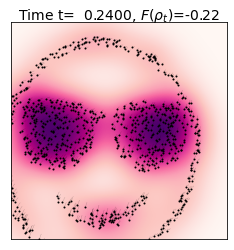

------------------------------------------------------------------------
Iter   W(ρ,ρ_t)  F(ρ)=       ℱ(ρ)   +  𝒱(ρ)     ‖X‖   ‖T(X)‖    ‖ΔT(X)‖
------------------------------------------------------------------------
   0   3.60e-05    -0.22     -2.62  3.06e-01     0.56     0.56   5.79e-03
 100   3.19e-05    -0.22     -2.63  3.06e-01     0.56     0.56   2.15e-04
 200   4.06e-05    -0.22     -2.62  3.06e-01     0.56     0.56   3.53e-05
 300   3.42e-05    -0.22     -2.63  3.06e-01     0.56     0.56   3.40e-05
 400   3.30e-05    -0.22     -2.63  3.06e-01     0.56     0.56   8.25e-05
 500   3.17e-05    -0.22     -2.63  3.06e-01     0.56     0.56   7.10e-05
 600   3.24e-05    -0.22     -2.63  3.06e-01     0.56     0.56   1.58e-04
 700   3.23e-05    -0.22     -2.63  3.06e-01     0.56     0.56   1.24e-04
 800   3.13e-05    -0.22     -2.63  3.06e-01     0.56     0.56   2.24e-04
 900   3.27e-05    -0.22     -2.63  3.06e-01     0.56     0.56   1.01e-04
1000   3.26e-05    -0.22     -2.63  3.06e-

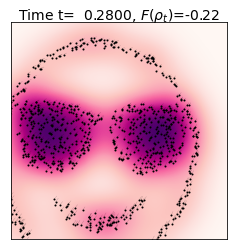

------------------------------------------------------------------------
Iter   W(ρ,ρ_t)  F(ρ)=       ℱ(ρ)   +  𝒱(ρ)     ‖X‖   ‖T(X)‖    ‖ΔT(X)‖
------------------------------------------------------------------------
   0   2.99e-05    -0.22     -2.58  2.99e-01     0.54     0.54   5.41e-03
 100   2.90e-05    -0.22     -2.59  2.99e-01     0.54     0.54   1.95e-04
 200   2.59e-05    -0.22     -2.59  2.99e-01     0.54     0.54   6.32e-05
 300   2.67e-05    -0.22     -2.59  2.99e-01     0.54     0.54   2.11e-05
 400   2.65e-05    -0.22     -2.59  2.99e-01     0.54     0.54   5.26e-05
 500   2.60e-05    -0.22     -2.59  2.99e-01     0.54     0.54   1.04e-04
 600   2.74e-05    -0.22     -2.59  2.99e-01     0.54     0.54   6.49e-05
 700   2.67e-05    -0.22     -2.59  2.99e-01     0.54     0.54   4.71e-05
 800   2.73e-05    -0.22     -2.59  2.99e-01     0.54     0.54   2.43e-04
 900   2.66e-05    -0.22     -2.59  2.99e-01     0.54     0.54   1.19e-04
1000   2.67e-05    -0.22     -2.59  2.99e-

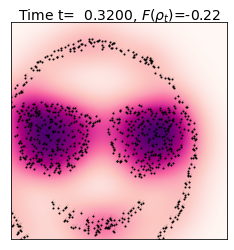

------------------------------------------------------------------------
Iter   W(ρ,ρ_t)  F(ρ)=       ℱ(ρ)   +  𝒱(ρ)     ‖X‖   ‖T(X)‖    ‖ΔT(X)‖
------------------------------------------------------------------------
   0   2.48e-05    -0.21     -2.54  2.94e-01     0.52     0.52   4.92e-03
 100   2.26e-05    -0.22     -2.55  2.94e-01     0.52     0.52   2.50e-04
 200   2.27e-05    -0.22     -2.55  2.94e-01     0.52     0.52   9.43e-05
 300   2.33e-05    -0.22     -2.55  2.94e-01     0.52     0.52   1.10e-04
 400   2.15e-05    -0.22     -2.55  2.94e-01     0.52     0.52   2.24e-04
 500   2.14e-05    -0.22     -2.55  2.94e-01     0.52     0.52   4.47e-04
 600   2.08e-05    -0.22     -2.55  2.94e-01     0.52     0.52   3.65e-04
 700   2.32e-05    -0.22     -2.55  2.94e-01     0.52     0.52   4.14e-04
 800   2.05e-05    -0.22     -2.55  2.94e-01     0.52     0.52   3.90e-04
 900   2.98e-05    -0.22     -2.55  2.94e-01     0.52     0.52   1.74e-03
1000   5.94e-05    -0.22     -2.55  2.92e-

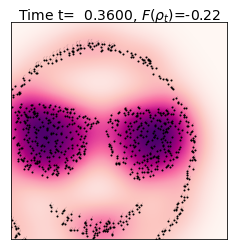

------------------------------------------------------------------------
Iter   W(ρ,ρ_t)  F(ρ)=       ℱ(ρ)   +  𝒱(ρ)     ‖X‖   ‖T(X)‖    ‖ΔT(X)‖
------------------------------------------------------------------------
   0   3.44e-05    -0.22     -2.54  2.89e-01     0.51     0.50   5.35e-03
 100   3.18e-05    -0.22     -2.53  2.89e-01     0.51     0.50   2.59e-04
 200   3.42e-05    -0.21     -2.52  2.89e-01     0.51     0.50   2.92e-05
 300   3.60e-05    -0.22     -2.53  2.89e-01     0.51     0.50   4.46e-05
 400   3.26e-05    -0.22     -2.54  2.89e-01     0.51     0.50   1.09e-04
 500   2.98e-05    -0.22     -2.54  2.89e-01     0.51     0.50   8.35e-05
 600   2.92e-05    -0.22     -2.54  2.89e-01     0.51     0.50   1.11e-04
 700   2.73e-05    -0.22     -2.53  2.89e-01     0.51     0.50   3.01e-04
 800   2.49e-05    -0.22     -2.53  2.89e-01     0.51     0.50   1.53e-04
 900   2.02e-05    -0.22     -2.53  2.89e-01     0.51     0.50   3.68e-04
1000   2.11e-05    -0.22     -2.53  2.89e-

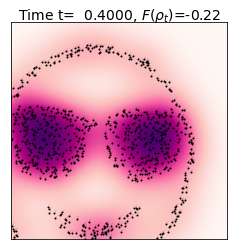

In [45]:
import importlib
import src.flow
import src.utils
import src.functionals
importlib.reload(src.flow)
importlib.reload(src.functionals)
importlib.reload(src.utils)
importlib.reload(src.callbacks)


from src.utils import meshgrid_from
from src.flow import GradFlow
from src.functionals import EntropyFunctional, InternalEnergyFunctional,FunctionalSum, PotentialFunctional
from src.callbacks import PlottingCallback


# F = EntropyFunctional(ρ0=ρ0)

# F = Func

### Define functional: non-linear diffusion + potential 
m = 2
f = lambda x: torch.pow(x, m)
multfun = lambda logr: torch.exp((m-1)*logr)
F1 = InternalEnergyFunctional(f, ρ0, X0, multfun)

V = lambda x: torch.norm(x-0.2,dim=1)**2

F2 = PotentialFunctional(V)

F  = FunctionalSum([F1, F2], weights = [0.2, 1])


fname = 'FP_nonlin'

save_path = None
save_path = os.path.join(outdir, img_name + '_' + fname)


cb1 = PlottingCallback(animate=False, display_freq=4, same_fig=False,
                       show_density=True,  figsize=(4,4), 
                       density_cmap=plt.cm.RdPu,
                       density_method='kde',
                       save_path=save_path
                      )




gf = GradFlow(X0, F=F, callbacks=cb1, τ=1e-2, lr = 1e-3, opt_iters=1000, save_path = save_path)

XT = gf.flow(steps=40)

### Aggregation 

No rdkit
tsnecuda not found - will use (slower) cpu implementation


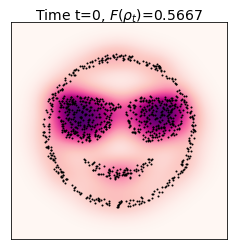

------------------------------------------------------
Iter   W(ρ,ρ_t) F(ρ)=𝒲(ρ)     ‖X‖   ‖T(X)‖    ‖ΔT(X)‖
------------------------------------------------------
Relative ratio between F and W terms in JKO is too unbalanced...
consider choosing τ in 10^[0.0,1.0] to balance them.
   0   1.09e+00   4.38e-01     0.72     1.40   1.03e+00
 100   1.33e-03   5.50e-01     0.72     0.72   7.39e-04
 200   7.99e-04   5.62e-01     0.72     0.72   2.17e-04

---> After JKO Step: 1, F(ρ)=5.6230e-01 <---



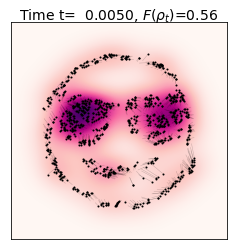

------------------------------------------------------
Iter   W(ρ,ρ_t) F(ρ)=𝒲(ρ)     ‖X‖   ‖T(X)‖    ‖ΔT(X)‖
------------------------------------------------------
   0   4.72e-04   5.61e-01     0.72     0.72   1.85e-02
 100   1.65e-04   5.55e-01     0.72     0.72   1.14e-03
 200   7.33e-05   5.55e-01     0.72     0.72   3.19e-04

---> After JKO Step: 2, F(ρ)=5.5561e-01 <---



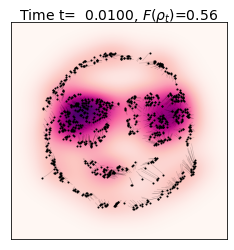

------------------------------------------------------
Iter   W(ρ,ρ_t) F(ρ)=𝒲(ρ)     ‖X‖   ‖T(X)‖    ‖ΔT(X)‖
------------------------------------------------------
   0   6.73e-05   5.50e-01     0.72     0.72   7.21e-03
 100   5.61e-05   5.48e-01     0.72     0.72   2.33e-04
 200   4.13e-05   5.49e-01     0.72     0.72   7.13e-05

---> After JKO Step: 3, F(ρ)=5.4879e-01 <---



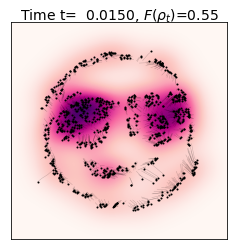

------------------------------------------------------
Iter   W(ρ,ρ_t) F(ρ)=𝒲(ρ)     ‖X‖   ‖T(X)‖    ‖ΔT(X)‖
------------------------------------------------------
   0   3.98e-05   5.43e-01     0.72     0.72   5.83e-03
 100   3.64e-05   5.43e-01     0.72     0.72   3.39e-05
 200   3.43e-05   5.43e-01     0.72     0.72   2.89e-05

---> After JKO Step: 4, F(ρ)=5.4332e-01 <---



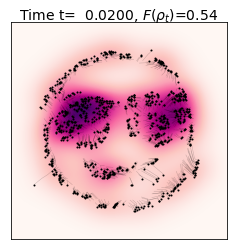

------------------------------------------------------
Iter   W(ρ,ρ_t) F(ρ)=𝒲(ρ)     ‖X‖   ‖T(X)‖    ‖ΔT(X)‖
------------------------------------------------------
   0   3.40e-05   5.37e-01     0.72     0.72   5.42e-03
 100   3.32e-05   5.37e-01     0.72     0.72   1.85e-04
 200   3.23e-05   5.37e-01     0.72     0.72   3.63e-05

---> After JKO Step: 5, F(ρ)=5.3750e-01 <---



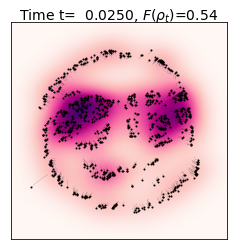

------------------------------------------------------
Iter   W(ρ,ρ_t) F(ρ)=𝒲(ρ)     ‖X‖   ‖T(X)‖    ‖ΔT(X)‖
------------------------------------------------------
   0   3.25e-05   5.31e-01     0.72     0.72   5.25e-03
 100   3.13e-05   5.31e-01     0.72     0.72   7.04e-05
 200   3.07e-05   5.31e-01     0.72     0.72   2.32e-05

---> After JKO Step: 6, F(ρ)=5.3150e-01 <---



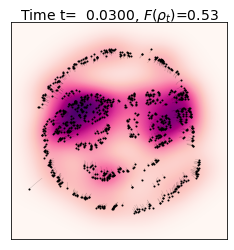

------------------------------------------------------
Iter   W(ρ,ρ_t) F(ρ)=𝒲(ρ)     ‖X‖   ‖T(X)‖    ‖ΔT(X)‖
------------------------------------------------------
   0   3.13e-05   5.26e-01     0.72     0.72   5.11e-03
 100   3.13e-05   5.26e-01     0.72     0.72   1.32e-04
 200   2.91e-05   5.26e-01     0.72     0.72   2.65e-05

---> After JKO Step: 7, F(ρ)=5.2635e-01 <---



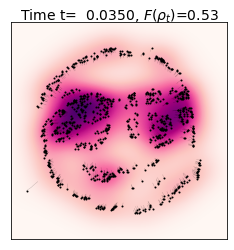

------------------------------------------------------
Iter   W(ρ,ρ_t) F(ρ)=𝒲(ρ)     ‖X‖   ‖T(X)‖    ‖ΔT(X)‖
------------------------------------------------------
   0   2.88e-05   5.22e-01     0.72     0.72   4.97e-03
 100   2.83e-05   5.22e-01     0.72     0.72   1.59e-04
 200   2.73e-05   5.22e-01     0.72     0.72   3.87e-05

---> After JKO Step: 8, F(ρ)=5.2152e-01 <---



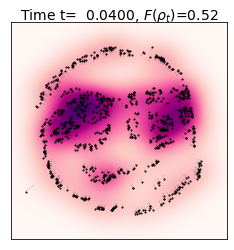

------------------------------------------------------
Iter   W(ρ,ρ_t) F(ρ)=𝒲(ρ)     ‖X‖   ‖T(X)‖    ‖ΔT(X)‖
------------------------------------------------------
   0   2.73e-05   5.17e-01     0.72     0.72   4.88e-03
 100   2.67e-05   5.17e-01     0.72     0.72   1.07e-04
 200   2.57e-05   5.17e-01     0.72     0.72   2.38e-05

---> After JKO Step: 9, F(ρ)=5.1703e-01 <---



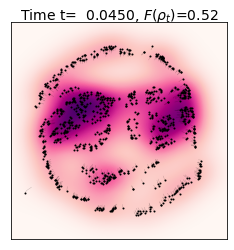

------------------------------------------------------
Iter   W(ρ,ρ_t) F(ρ)=𝒲(ρ)     ‖X‖   ‖T(X)‖    ‖ΔT(X)‖
------------------------------------------------------
   0   2.53e-05   5.13e-01     0.72     0.72   4.72e-03
 100   2.38e-05   5.13e-01     0.72     0.72   7.93e-05
 200   2.48e-05   5.12e-01     0.72     0.72   1.04e-04

---> After JKO Step: 10, F(ρ)=5.1213e-01 <---



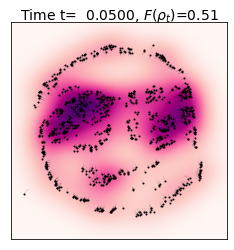

------------------------------------------------------
Iter   W(ρ,ρ_t) F(ρ)=𝒲(ρ)     ‖X‖   ‖T(X)‖    ‖ΔT(X)‖
------------------------------------------------------
   0   2.45e-05   5.09e-01     0.72     0.72   4.69e-03
 100   2.42e-05   5.08e-01     0.72     0.72   1.15e-04
 200   2.31e-05   5.08e-01     0.72     0.72   1.46e-05

---> After JKO Step: 11, F(ρ)=5.0825e-01 <---



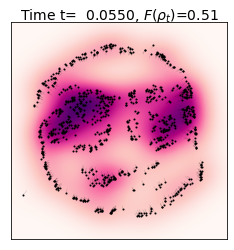

------------------------------------------------------
Iter   W(ρ,ρ_t) F(ρ)=𝒲(ρ)     ‖X‖   ‖T(X)‖    ‖ΔT(X)‖
------------------------------------------------------
   0   2.33e-05   5.04e-01     0.72     0.72   4.51e-03
 100   2.32e-05   5.04e-01     0.72     0.72   1.39e-04
 200   2.16e-05   5.04e-01     0.72     0.72   2.02e-05

---> After JKO Step: 12, F(ρ)=5.0427e-01 <---



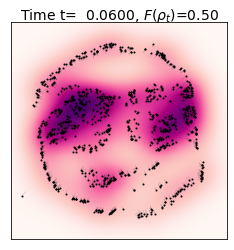

------------------------------------------------------
Iter   W(ρ,ρ_t) F(ρ)=𝒲(ρ)     ‖X‖   ‖T(X)‖    ‖ΔT(X)‖
------------------------------------------------------
   0   2.19e-05   5.00e-01     0.72     0.72   4.39e-03
 100   2.15e-05   5.01e-01     0.72     0.72   5.96e-05
 200   2.06e-05   5.01e-01     0.72     0.72   1.48e-05

---> After JKO Step: 13, F(ρ)=5.0047e-01 <---



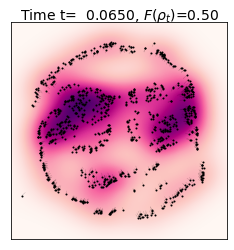

------------------------------------------------------
Iter   W(ρ,ρ_t) F(ρ)=𝒲(ρ)     ‖X‖   ‖T(X)‖    ‖ΔT(X)‖
------------------------------------------------------
   0   2.06e-05   4.96e-01     0.72     0.72   4.27e-03
 100   2.10e-05   4.97e-01     0.72     0.72   1.47e-04
 200   1.99e-05   4.97e-01     0.72     0.72   6.79e-06

---> After JKO Step: 14, F(ρ)=4.9614e-01 <---



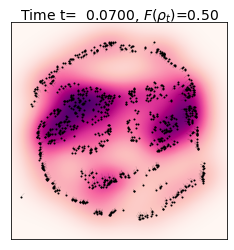

------------------------------------------------------
Iter   W(ρ,ρ_t) F(ρ)=𝒲(ρ)     ‖X‖   ‖T(X)‖    ‖ΔT(X)‖
------------------------------------------------------
   0   2.00e-05   4.92e-01     0.72     0.72   4.20e-03
 100   2.06e-05   4.93e-01     0.72     0.72   3.15e-05
 200   1.89e-05   4.93e-01     0.72     0.72   6.64e-06

---> After JKO Step: 15, F(ρ)=4.9260e-01 <---



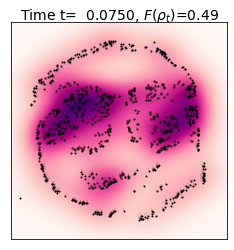

------------------------------------------------------
Iter   W(ρ,ρ_t) F(ρ)=𝒲(ρ)     ‖X‖   ‖T(X)‖    ‖ΔT(X)‖
------------------------------------------------------
   0   1.90e-05   4.90e-01     0.72     0.72   4.07e-03
 100   1.84e-05   4.89e-01     0.72     0.72   1.14e-04
 200   1.82e-05   4.89e-01     0.72     0.72   9.96e-06

---> After JKO Step: 16, F(ρ)=4.9003e-01 <---



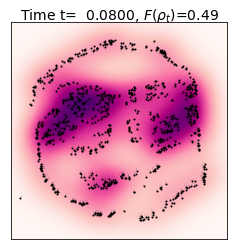

------------------------------------------------------
Iter   W(ρ,ρ_t) F(ρ)=𝒲(ρ)     ‖X‖   ‖T(X)‖    ‖ΔT(X)‖
------------------------------------------------------
   0   1.84e-05   4.84e-01     0.72     0.72   4.01e-03
 100   1.82e-05   4.87e-01     0.72     0.72   8.56e-05
 200   1.76e-05   4.86e-01     0.72     0.72   1.51e-05

---> After JKO Step: 17, F(ρ)=4.8644e-01 <---



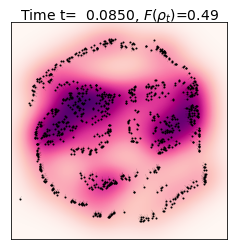

------------------------------------------------------
Iter   W(ρ,ρ_t) F(ρ)=𝒲(ρ)     ‖X‖   ‖T(X)‖    ‖ΔT(X)‖
------------------------------------------------------
   0   1.77e-05   4.83e-01     0.72     0.72   3.97e-03
 100   1.68e-05   4.83e-01     0.72     0.72   1.06e-04
 200   1.70e-05   4.83e-01     0.72     0.72   6.22e-06

---> After JKO Step: 18, F(ρ)=4.8232e-01 <---



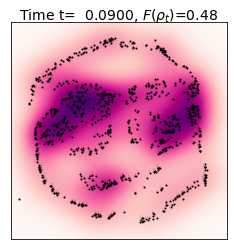

------------------------------------------------------
Iter   W(ρ,ρ_t) F(ρ)=𝒲(ρ)     ‖X‖   ‖T(X)‖    ‖ΔT(X)‖
------------------------------------------------------
   0   1.71e-05   4.79e-01     0.72     0.72   3.92e-03
 100   1.58e-05   4.79e-01     0.72     0.72   1.48e-04
 200   1.65e-05   4.79e-01     0.72     0.72   9.67e-06

---> After JKO Step: 19, F(ρ)=4.7966e-01 <---



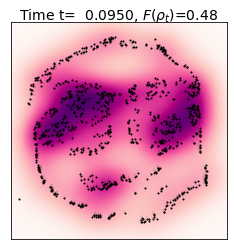

------------------------------------------------------
Iter   W(ρ,ρ_t) F(ρ)=𝒲(ρ)     ‖X‖   ‖T(X)‖    ‖ΔT(X)‖
------------------------------------------------------
   0   1.65e-05   4.77e-01     0.72     0.72   3.87e-03
 100   1.67e-05   4.77e-01     0.72     0.72   1.11e-04
 200   1.63e-05   4.77e-01     0.72     0.72   2.03e-05

---> After JKO Step: 20, F(ρ)=4.7560e-01 <---



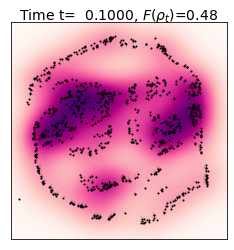

In [40]:
import importlib
import src.flow
import src.utils
import src.functionals
importlib.reload(src.flow)
importlib.reload(src.functionals)
importlib.reload(src.utils)
importlib.reload(src.callbacks)


from src.utils import meshgrid_from
from src.flow import GradFlow
from src.functionals import EntropyFunctional, InteractionFunctional
from src.callbacks import PlottingCallback


# F = EntropyFunctional(ρ0=ρ0)

# F = Func

### Define functional: non-linear diffusion + potential 

### Define Functional: Interaction Energy
W = lambda x: 0.5*torch.pow(x,2).sum(dim=-1) - torch.log(torch.norm(x,dim=-1))
F = InteractionFunctional(W)



fname = 'Agg'

save_path = None
save_path = os.path.join(outdir, img_name + '_' + fname)


cb1 = PlottingCallback(animate=False, display_freq=1, same_fig=False,
                       show_density=True,  figsize=(4,4), 
                       density_cmap=plt.cm.RdPu,
                       density_method='kde',
                       save_path=save_path
                      )




gf = GradFlow(X0, F=F, callbacks=cb1, τ=5e-3, lr = 1e-3, opt_iters=200, save_path = save_path)

XT = gf.flow(steps=20)

## RGB-space dynamics

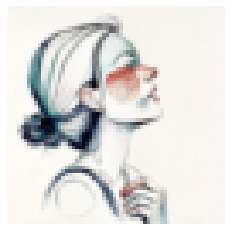

In [158]:
from PIL import Image
from IPython.display import display # to display images
from torchvision import transforms
import src.distributions
importlib.reload(src.distributions)
from src.distributions import pixels_from_image



X = pixels_from_image("../img/Painting.jpeg", crop =1000, resize = 64)


In [155]:
import src.flow
import src.functionals
importlib.reload(src.flow)
importlib.reload(src.functionals)


from src.flow import GradFlow
from src.functionals import EntropyFunctional

F = EntropyFunctional()
fname = 'HeatEq'

save_path = os.path.join('../out/toy_pde/', fname)

gf = GradFlow(X, F=F, τ=1e-3, lr = 1e-3, opt_iters=100, animate=True, save_path = save_path)

XT = gf.flow(steps=100)

tensor(0.0078) tensor(1.)
JKO Step: 1
It     W(ρ,ρ_t) F(ρ)=ℱ(ρ)     ‖X‖   ‖T(X)‖  ‖ΔT(X)‖
   0       0.34     -3.00    1.50    1.56    0.58


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


 100       0.00     -3.00    1.50    1.50    0.00
tensor(-0.0250) tensor(0.9999)
JKO Step: 2
It     W(ρ,ρ_t) F(ρ)=ℱ(ρ)     ‖X‖   ‖T(X)‖  ‖ΔT(X)‖
   0       1.22     -3.00    1.50    0.86    1.10


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


 100       0.00     -3.00    1.50    1.49    0.00
tensor(0.0101) tensor(1.0062)
JKO Step: 3
It     W(ρ,ρ_t) F(ρ)=ℱ(ρ)     ‖X‖   ‖T(X)‖  ‖ΔT(X)‖
   0       0.29     -3.00    1.49    1.37    0.54


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


 100       0.00     -3.00    1.49    1.49    0.00
tensor(-0.0001) tensor(1.0033)
JKO Step: 4
It     W(ρ,ρ_t) F(ρ)=ℱ(ρ)     ‖X‖   ‖T(X)‖  ‖ΔT(X)‖
   0       0.81     -3.00    1.49    1.42    0.90


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


 100       0.00     -3.00    1.49    1.49    0.00
tensor(-0.0158) tensor(1.0072)
JKO Step: 5
It     W(ρ,ρ_t) F(ρ)=ℱ(ρ)     ‖X‖   ‖T(X)‖  ‖ΔT(X)‖
   0       0.13     -3.00    1.49    1.35    0.36


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


 100       0.00     -3.00    1.49    1.49    0.00
tensor(-0.1031) tensor(1.0297)
JKO Step: 6
It     W(ρ,ρ_t) F(ρ)=ℱ(ρ)     ‖X‖   ‖T(X)‖  ‖ΔT(X)‖
   0       0.69     -3.00    1.49    0.69    0.82


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


 100       0.00     -3.00    1.49    1.49    0.00
tensor(-0.1882) tensor(1.0433)
JKO Step: 7
It     W(ρ,ρ_t) F(ρ)=ℱ(ρ)     ‖X‖   ‖T(X)‖  ‖ΔT(X)‖
   0       0.09     -3.00    1.49    1.71    0.29


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


 100       0.00     -3.00    1.49    1.49    0.00
tensor(-0.3080) tensor(1.0503)
JKO Step: 8
It     W(ρ,ρ_t) F(ρ)=ℱ(ρ)     ‖X‖   ‖T(X)‖  ‖ΔT(X)‖
   0       0.95     -3.00    1.49    0.63    0.96


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


 100       0.00     -3.00    1.49    1.49    0.00
tensor(-0.3498) tensor(1.0644)
JKO Step: 9
It     W(ρ,ρ_t) F(ρ)=ℱ(ρ)     ‖X‖   ‖T(X)‖  ‖ΔT(X)‖
   0       0.63     -3.00    1.49    1.29    0.79


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


 100       0.00     -3.00    1.49    1.49    0.00
tensor(-0.3260) tensor(1.0490)
JKO Step: 10
It     W(ρ,ρ_t) F(ρ)=ℱ(ρ)     ‖X‖   ‖T(X)‖  ‖ΔT(X)‖
   0       0.48     -3.00    1.49    1.19    0.69


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


 100       0.00     -3.00    1.49    1.49    0.00
tensor(-0.3880) tensor(1.0507)
JKO Step: 11
It     W(ρ,ρ_t) F(ρ)=ℱ(ρ)     ‖X‖   ‖T(X)‖  ‖ΔT(X)‖
   0       0.29     -3.00    1.49    1.51    0.54


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


 100       0.00     -3.00    1.49    1.49    0.00
tensor(-0.4884) tensor(1.0567)
JKO Step: 12
It     W(ρ,ρ_t) F(ρ)=ℱ(ρ)     ‖X‖   ‖T(X)‖  ‖ΔT(X)‖
   0       0.88     -3.00    1.49    1.07    0.93


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


 100       0.00     -3.00    1.49    1.49    0.00
tensor(-0.5503) tensor(1.0859)
JKO Step: 13
It     W(ρ,ρ_t) F(ρ)=ℱ(ρ)     ‖X‖   ‖T(X)‖  ‖ΔT(X)‖
   0       0.70     -3.00    1.49    1.24    0.84


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


 100       0.00     -3.00    1.49    1.49    0.00
tensor(-0.6088) tensor(1.1617)
JKO Step: 14
It     W(ρ,ρ_t) F(ρ)=ℱ(ρ)     ‖X‖   ‖T(X)‖  ‖ΔT(X)‖
   0       0.63     -3.00    1.49    1.07    0.79


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


 100       0.00     -3.00    1.49    1.49    0.00
tensor(-0.6931) tensor(1.2015)
JKO Step: 15
It     W(ρ,ρ_t) F(ρ)=ℱ(ρ)     ‖X‖   ‖T(X)‖  ‖ΔT(X)‖
   0       0.64     -3.00    1.49    0.75    0.79


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


 100       0.00     -3.00    1.49    1.49    0.00
tensor(-0.7158) tensor(1.1601)
JKO Step: 16
It     W(ρ,ρ_t) F(ρ)=ℱ(ρ)     ‖X‖   ‖T(X)‖  ‖ΔT(X)‖
   0       1.14     -3.00    1.49    0.76    1.05


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


 100       0.00     -3.00    1.49    1.49    0.00
tensor(-0.7637) tensor(1.2461)
JKO Step: 17
It     W(ρ,ρ_t) F(ρ)=ℱ(ρ)     ‖X‖   ‖T(X)‖  ‖ΔT(X)‖
   0       0.87     -3.00    1.49    0.59    0.92


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


 100       0.00     -3.00    1.49    1.49    0.00
tensor(-0.7227) tensor(1.3056)
JKO Step: 18
It     W(ρ,ρ_t) F(ρ)=ℱ(ρ)     ‖X‖   ‖T(X)‖  ‖ΔT(X)‖
   0       0.06     -3.00    1.49    1.66    0.24


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


 100       0.00     -3.00    1.49    1.49    0.00
tensor(-0.7527) tensor(1.3894)
JKO Step: 19
It     W(ρ,ρ_t) F(ρ)=ℱ(ρ)     ‖X‖   ‖T(X)‖  ‖ΔT(X)‖
   0       1.71     -3.00    1.49    0.93    1.29


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


 100       0.00     -3.00    1.49    1.49    0.00
tensor(-0.8938) tensor(1.4774)
JKO Step: 20
It     W(ρ,ρ_t) F(ρ)=ℱ(ρ)     ‖X‖   ‖T(X)‖  ‖ΔT(X)‖
   0       1.18     -3.00    1.49    1.41    1.08


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


 100       0.00     -3.00    1.49    1.49    0.00
tensor(-0.8687) tensor(1.6353)
JKO Step: 21
It     W(ρ,ρ_t) F(ρ)=ℱ(ρ)     ‖X‖   ‖T(X)‖  ‖ΔT(X)‖
   0       0.47     -3.00    1.49    1.07    0.68


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


 100       0.00     -3.00    1.49    1.49    0.00
tensor(-0.9421) tensor(1.6630)
JKO Step: 22
It     W(ρ,ρ_t) F(ρ)=ℱ(ρ)     ‖X‖   ‖T(X)‖  ‖ΔT(X)‖
   0       1.24     -3.00    1.49    0.73    1.11


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


 100       0.00     -3.00    1.49    1.49    0.00
tensor(-0.7895) tensor(1.8212)
JKO Step: 23
It     W(ρ,ρ_t) F(ρ)=ℱ(ρ)     ‖X‖   ‖T(X)‖  ‖ΔT(X)‖
   0       0.08     -3.00    1.49    1.26    0.28


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


 100       0.00     -3.00    1.49    1.49    0.00
tensor(-0.7863) tensor(1.7661)
JKO Step: 24
It     W(ρ,ρ_t) F(ρ)=ℱ(ρ)     ‖X‖   ‖T(X)‖  ‖ΔT(X)‖
   0       0.89     -3.00    1.49    0.63    0.94


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


 100       0.00     -3.00    1.49    1.49    0.00
tensor(-0.8914) tensor(2.0114)
JKO Step: 25
It     W(ρ,ρ_t) F(ρ)=ℱ(ρ)     ‖X‖   ‖T(X)‖  ‖ΔT(X)‖
   0       0.85     -3.00    1.49    1.03    0.92


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


 100       0.00     -3.00    1.49    1.49    0.00
tensor(-0.9577) tensor(2.0812)
JKO Step: 26
It     W(ρ,ρ_t) F(ρ)=ℱ(ρ)     ‖X‖   ‖T(X)‖  ‖ΔT(X)‖
   0       1.22     -3.00    1.49    0.93    1.09


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


 100       0.00     -3.00    1.49    1.49    0.00
tensor(-0.9542) tensor(2.2387)
JKO Step: 27
It     W(ρ,ρ_t) F(ρ)=ℱ(ρ)     ‖X‖   ‖T(X)‖  ‖ΔT(X)‖
   0       0.18     -3.00    1.49    1.48    0.42


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


 100       0.00     -3.00    1.49    1.49    0.00
tensor(-0.8718) tensor(2.2314)
JKO Step: 28
It     W(ρ,ρ_t) F(ρ)=ℱ(ρ)     ‖X‖   ‖T(X)‖  ‖ΔT(X)‖
   0       2.50     -3.00    1.49    0.07    1.57


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


 100       0.00     -3.00    1.49    1.49    0.00
tensor(-0.7815) tensor(2.4020)
JKO Step: 29
It     W(ρ,ρ_t) F(ρ)=ℱ(ρ)     ‖X‖   ‖T(X)‖  ‖ΔT(X)‖
   0       0.08     -3.00    1.49    1.46    0.25


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


 100       0.00     -3.00    1.49    1.49    0.00
tensor(-0.8559) tensor(2.4868)
JKO Step: 30
It     W(ρ,ρ_t) F(ρ)=ℱ(ρ)     ‖X‖   ‖T(X)‖  ‖ΔT(X)‖
   0       0.58     -3.00    1.49    1.16    0.76


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


 100       0.00     -3.00    1.49    1.49    0.00
tensor(-0.9183) tensor(2.5279)
JKO Step: 31
It     W(ρ,ρ_t) F(ρ)=ℱ(ρ)     ‖X‖   ‖T(X)‖  ‖ΔT(X)‖
   0       0.97     -3.00    1.49    0.91    0.98


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


 100       0.00     -3.00    1.49    1.49    0.00
tensor(-1.1835) tensor(2.3528)
JKO Step: 32
It     W(ρ,ρ_t) F(ρ)=ℱ(ρ)     ‖X‖   ‖T(X)‖  ‖ΔT(X)‖
   0       0.28     -3.00    1.49    1.73    0.52


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


 100       0.00     -3.00    1.49    1.49    0.00
tensor(-1.2466) tensor(2.4863)
JKO Step: 33
It     W(ρ,ρ_t) F(ρ)=ℱ(ρ)     ‖X‖   ‖T(X)‖  ‖ΔT(X)‖
   0       0.53     -3.00    1.49    0.89    0.72


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


 100       0.00     -3.00    1.49    1.50    0.00
tensor(-1.2521) tensor(2.4858)
JKO Step: 34
It     W(ρ,ρ_t) F(ρ)=ℱ(ρ)     ‖X‖   ‖T(X)‖  ‖ΔT(X)‖
   0       0.66     -3.00    1.50    1.03    0.80


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


 100       0.00     -3.00    1.50    1.50    0.00
tensor(-1.2242) tensor(2.5945)
JKO Step: 35
It     W(ρ,ρ_t) F(ρ)=ℱ(ρ)     ‖X‖   ‖T(X)‖  ‖ΔT(X)‖
   0       0.50     -3.00    1.50    1.01    0.70


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


 100       0.00     -3.00    1.50    1.50    0.00
tensor(-1.2649) tensor(2.7090)
JKO Step: 36
It     W(ρ,ρ_t) F(ρ)=ℱ(ρ)     ‖X‖   ‖T(X)‖  ‖ΔT(X)‖
   0       1.23     -3.00    1.50    0.52    1.10


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


 100       0.00     -3.00    1.50    1.49    0.00
tensor(-1.2399) tensor(2.7163)
JKO Step: 37
It     W(ρ,ρ_t) F(ρ)=ℱ(ρ)     ‖X‖   ‖T(X)‖  ‖ΔT(X)‖
   0       0.62     -3.00    1.49    0.88    0.79


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


 100       0.00     -3.00    1.49    1.49    0.00
tensor(-1.2439) tensor(2.8238)
JKO Step: 38
It     W(ρ,ρ_t) F(ρ)=ℱ(ρ)     ‖X‖   ‖T(X)‖  ‖ΔT(X)‖
   0       0.53     -3.00    1.49    1.03    0.73


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


 100       0.00     -3.00    1.49    1.49    0.02
tensor(-1.3192) tensor(2.8501)
JKO Step: 39
It     W(ρ,ρ_t) F(ρ)=ℱ(ρ)     ‖X‖   ‖T(X)‖  ‖ΔT(X)‖
   0       0.11     -3.00    1.49    1.44    0.28


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


 100       0.00     -3.00    1.49    1.50    0.00
tensor(-1.4732) tensor(2.9193)
JKO Step: 40
It     W(ρ,ρ_t) F(ρ)=ℱ(ρ)     ‖X‖   ‖T(X)‖  ‖ΔT(X)‖
   0       0.08     -3.00    1.49    1.63    0.25


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


 100       0.00     -3.00    1.49    1.50    0.00
tensor(-1.5148) tensor(2.8397)
JKO Step: 41
It     W(ρ,ρ_t) F(ρ)=ℱ(ρ)     ‖X‖   ‖T(X)‖  ‖ΔT(X)‖
   0       1.04     -3.00    1.50    0.67    1.01


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


 100       0.00     -3.00    1.50    1.49    0.00
tensor(-1.4646) tensor(2.8685)
JKO Step: 42
It     W(ρ,ρ_t) F(ρ)=ℱ(ρ)     ‖X‖   ‖T(X)‖  ‖ΔT(X)‖
   0       0.93     -3.00    1.49    1.59    0.96


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


 100       0.00     -3.00    1.49    1.49    0.00
tensor(-1.6519) tensor(3.1198)
JKO Step: 43
It     W(ρ,ρ_t) F(ρ)=ℱ(ρ)     ‖X‖   ‖T(X)‖  ‖ΔT(X)‖
   0       1.50     -3.00    1.49    1.27    1.22


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


 100       0.00     -3.00    1.49    1.49    0.00
tensor(-1.7954) tensor(3.3846)
JKO Step: 44
It     W(ρ,ρ_t) F(ρ)=ℱ(ρ)     ‖X‖   ‖T(X)‖  ‖ΔT(X)‖
   0       0.35     -3.00    1.50    1.25    0.58


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


 100       0.00     -3.00    1.50    1.50    0.00
tensor(-1.8787) tensor(3.5154)
JKO Step: 45
It     W(ρ,ρ_t) F(ρ)=ℱ(ρ)     ‖X‖   ‖T(X)‖  ‖ΔT(X)‖
   0       2.21     -3.00    1.50    0.39    1.47


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


 100       0.00     -3.00    1.50    1.50    0.00
tensor(-1.9511) tensor(3.6873)
JKO Step: 46
It     W(ρ,ρ_t) F(ρ)=ℱ(ρ)     ‖X‖   ‖T(X)‖  ‖ΔT(X)‖
   0       0.76     -3.00    1.50    0.80    0.87


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


 100       0.00     -3.00    1.50    1.50    0.00
tensor(-1.9744) tensor(3.5578)
JKO Step: 47
It     W(ρ,ρ_t) F(ρ)=ℱ(ρ)     ‖X‖   ‖T(X)‖  ‖ΔT(X)‖
   0       1.49     -3.00    1.50    0.36    1.20


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


 100       0.00     -3.00    1.50    1.50    0.00
tensor(-1.9427) tensor(3.6473)
JKO Step: 48
It     W(ρ,ρ_t) F(ρ)=ℱ(ρ)     ‖X‖   ‖T(X)‖  ‖ΔT(X)‖
   0       0.18     -3.00    1.50    1.51    0.42


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


 100       0.00     -3.00    1.50    1.50    0.00
tensor(-1.9953) tensor(3.5652)
JKO Step: 49
It     W(ρ,ρ_t) F(ρ)=ℱ(ρ)     ‖X‖   ‖T(X)‖  ‖ΔT(X)‖
   0       1.74     -3.00    1.50    0.44    1.30


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


 100       0.00     -3.00    1.50    1.50    0.00
tensor(-2.0484) tensor(3.6018)
JKO Step: 50
It     W(ρ,ρ_t) F(ρ)=ℱ(ρ)     ‖X‖   ‖T(X)‖  ‖ΔT(X)‖
   0       0.55     -3.00    1.50    0.86    0.74


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


 100       0.00     -3.00    1.50    1.50    0.00
tensor(-2.0947) tensor(3.6597)
JKO Step: 51
It     W(ρ,ρ_t) F(ρ)=ℱ(ρ)     ‖X‖   ‖T(X)‖  ‖ΔT(X)‖
   0       0.05     -3.00    1.50    1.70    0.21


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


 100       0.00     -3.00    1.50    1.50    0.00
tensor(-2.2212) tensor(3.6057)
JKO Step: 52
It     W(ρ,ρ_t) F(ρ)=ℱ(ρ)     ‖X‖   ‖T(X)‖  ‖ΔT(X)‖
   0       1.00     -3.00    1.50    0.83    0.99


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


 100       0.00     -3.00    1.50    1.50    0.00
tensor(-2.2095) tensor(3.8491)
JKO Step: 53
It     W(ρ,ρ_t) F(ρ)=ℱ(ρ)     ‖X‖   ‖T(X)‖  ‖ΔT(X)‖
   0       0.84     -3.00    1.50    1.03    0.91


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


 100       0.00     -3.00    1.50    1.50    0.00
tensor(-2.1926) tensor(3.9498)
JKO Step: 54
It     W(ρ,ρ_t) F(ρ)=ℱ(ρ)     ‖X‖   ‖T(X)‖  ‖ΔT(X)‖
   0       0.48     -3.00    1.50    1.36    0.69


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


 100       0.00     -3.00    1.50    1.51    0.00
tensor(-2.1672) tensor(4.0197)
JKO Step: 55
It     W(ρ,ρ_t) F(ρ)=ℱ(ρ)     ‖X‖   ‖T(X)‖  ‖ΔT(X)‖
   0       0.90     -3.00    1.50    0.67    0.93


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


 100       0.00     -3.00    1.50    1.50    0.00
tensor(-2.2064) tensor(3.9622)
JKO Step: 56
It     W(ρ,ρ_t) F(ρ)=ℱ(ρ)     ‖X‖   ‖T(X)‖  ‖ΔT(X)‖
   0       0.79     -3.00    1.50    1.55    0.89


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


 100       0.00     -3.00    1.50    1.50    0.01
tensor(-2.4031) tensor(3.9851)
JKO Step: 57
It     W(ρ,ρ_t) F(ρ)=ℱ(ρ)     ‖X‖   ‖T(X)‖  ‖ΔT(X)‖
   0       0.80     -3.00    1.50    1.39    0.89


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


 100       0.00     -3.00    1.50    1.51    0.00
tensor(-2.3920) tensor(3.8710)
JKO Step: 58
It     W(ρ,ρ_t) F(ρ)=ℱ(ρ)     ‖X‖   ‖T(X)‖  ‖ΔT(X)‖
   0       1.04     -3.00    1.50    0.69    1.00


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


 100       0.00     -3.00    1.50    1.51    0.00
tensor(-2.5566) tensor(4.0054)
JKO Step: 59
It     W(ρ,ρ_t) F(ρ)=ℱ(ρ)     ‖X‖   ‖T(X)‖  ‖ΔT(X)‖
   0       0.29     -3.00    1.51    1.90    0.51


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


 100       0.00     -3.00    1.51    1.51    0.00
tensor(-2.9333) tensor(4.1842)
JKO Step: 60
It     W(ρ,ρ_t) F(ρ)=ℱ(ρ)     ‖X‖   ‖T(X)‖  ‖ΔT(X)‖
   0       2.32     -3.00    1.51    0.79    1.51


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


 100       0.00     -3.00    1.51    1.51    0.00
tensor(-3.0350) tensor(4.3896)
JKO Step: 61
It     W(ρ,ρ_t) F(ρ)=ℱ(ρ)     ‖X‖   ‖T(X)‖  ‖ΔT(X)‖
   0       0.26     -3.00    1.51    1.35    0.50


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


 100       0.00     -3.00    1.51    1.51    0.00
tensor(-3.0434) tensor(4.5664)
JKO Step: 62
It     W(ρ,ρ_t) F(ρ)=ℱ(ρ)     ‖X‖   ‖T(X)‖  ‖ΔT(X)‖
   0       2.56     -3.00    1.51    0.07    1.57


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


 100       0.00     -3.00    1.51    1.50    0.00
tensor(-3.1115) tensor(4.8230)
JKO Step: 63
It     W(ρ,ρ_t) F(ρ)=ℱ(ρ)     ‖X‖   ‖T(X)‖  ‖ΔT(X)‖
   0       0.16     -3.00    1.50    1.72    0.37


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


 100       0.00     -3.00    1.50    1.50    0.00
tensor(-3.0758) tensor(5.0050)
JKO Step: 64
It     W(ρ,ρ_t) F(ρ)=ℱ(ρ)     ‖X‖   ‖T(X)‖  ‖ΔT(X)‖
   0       1.19     -3.00    1.50    0.94    1.08


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


 100       0.00     -3.00    1.50    1.50    0.00
tensor(-3.0263) tensor(5.1287)
JKO Step: 65
It     W(ρ,ρ_t) F(ρ)=ℱ(ρ)     ‖X‖   ‖T(X)‖  ‖ΔT(X)‖
   0       0.45     -3.00    1.50    1.54    0.66


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


 100       0.00     -3.00    1.50    1.50    0.00
tensor(-3.1892) tensor(5.2541)
JKO Step: 66
It     W(ρ,ρ_t) F(ρ)=ℱ(ρ)     ‖X‖   ‖T(X)‖  ‖ΔT(X)‖
   0       1.20     -3.00    1.50    1.53    1.08


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


 100       0.00     -3.00    1.50    1.51    0.00
tensor(-3.6284) tensor(5.5701)
JKO Step: 67
It     W(ρ,ρ_t) F(ρ)=ℱ(ρ)     ‖X‖   ‖T(X)‖  ‖ΔT(X)‖
   0       0.58     -3.00    1.51    1.00    0.75


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


 100       0.00     -3.00    1.51    1.52    0.02
tensor(-3.7283) tensor(5.6971)
JKO Step: 68
It     W(ρ,ρ_t) F(ρ)=ℱ(ρ)     ‖X‖   ‖T(X)‖  ‖ΔT(X)‖
   0       1.07     -3.00    1.51    0.61    1.01


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


 100       0.00     -3.00    1.51    1.51    0.00
tensor(-3.7008) tensor(5.8314)
JKO Step: 69
It     W(ρ,ρ_t) F(ρ)=ℱ(ρ)     ‖X‖   ‖T(X)‖  ‖ΔT(X)‖
   0       1.62     -3.00    1.51    1.07    1.26


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


 100       0.00     -3.00    1.51    1.51    0.00
tensor(-3.6272) tensor(5.8681)
JKO Step: 70
It     W(ρ,ρ_t) F(ρ)=ℱ(ρ)     ‖X‖   ‖T(X)‖  ‖ΔT(X)‖
   0       1.92     -3.00    1.51    0.17    1.37


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


 100       0.00     -3.00    1.51    1.51    0.00
tensor(-3.7543) tensor(6.1381)
JKO Step: 71
It     W(ρ,ρ_t) F(ρ)=ℱ(ρ)     ‖X‖   ‖T(X)‖  ‖ΔT(X)‖
   0       0.98     -3.00    1.51    0.97    0.98


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


 100       0.00     -3.00    1.51    1.52    0.00
tensor(-3.9143) tensor(6.0911)
JKO Step: 72
It     W(ρ,ρ_t) F(ρ)=ℱ(ρ)     ‖X‖   ‖T(X)‖  ‖ΔT(X)‖
   0       1.33     -3.00    1.51    1.00    1.15


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


 100       0.00     -3.00    1.51    1.52    0.01
tensor(-4.0894) tensor(6.1942)
JKO Step: 73
It     W(ρ,ρ_t) F(ρ)=ℱ(ρ)     ‖X‖   ‖T(X)‖  ‖ΔT(X)‖
   0       2.65     -3.00    1.52    0.05    1.59


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


 100       0.00     -3.00    1.52    1.51    0.00
tensor(-3.9521) tensor(6.4071)
JKO Step: 74
It     W(ρ,ρ_t) F(ρ)=ℱ(ρ)     ‖X‖   ‖T(X)‖  ‖ΔT(X)‖
   0       0.24     -3.00    1.52    1.45    0.49


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


 100       0.00     -3.00    1.52    1.52    0.00
tensor(-3.8685) tensor(6.5305)
JKO Step: 75
It     W(ρ,ρ_t) F(ρ)=ℱ(ρ)     ‖X‖   ‖T(X)‖  ‖ΔT(X)‖
   0       0.76     -3.00    1.52    0.87    0.86


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


 100       0.00     -3.00    1.52    1.52    0.00
tensor(-3.8741) tensor(6.5997)
JKO Step: 76
It     W(ρ,ρ_t) F(ρ)=ℱ(ρ)     ‖X‖   ‖T(X)‖  ‖ΔT(X)‖
   0       1.27     -3.00    1.52    0.92    1.11


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


 100       0.00     -3.00    1.52    1.52    0.00
tensor(-3.8666) tensor(6.3043)
JKO Step: 77
It     W(ρ,ρ_t) F(ρ)=ℱ(ρ)     ‖X‖   ‖T(X)‖  ‖ΔT(X)‖
   0       0.55     -3.00    1.52    1.47    0.74


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


 100       0.00     -3.00    1.52    1.52    0.00
tensor(-3.8824) tensor(6.2241)
JKO Step: 78
It     W(ρ,ρ_t) F(ρ)=ℱ(ρ)     ‖X‖   ‖T(X)‖  ‖ΔT(X)‖
   0       1.03     -3.00    1.52    0.57    0.99


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


 100       0.00     -3.00    1.52    1.52    0.00
tensor(-3.9066) tensor(6.4475)
JKO Step: 79
It     W(ρ,ρ_t) F(ρ)=ℱ(ρ)     ‖X‖   ‖T(X)‖  ‖ΔT(X)‖
   0       0.48     -3.00    1.52    1.29    0.69


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


 100       0.00     -3.00    1.52    1.52    0.00
tensor(-4.0413) tensor(6.3944)
JKO Step: 80
It     W(ρ,ρ_t) F(ρ)=ℱ(ρ)     ‖X‖   ‖T(X)‖  ‖ΔT(X)‖
   0       0.13     -3.00    1.52    1.29    0.35


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


 100       0.00     -3.00    1.52    1.53    0.02
tensor(-3.8074) tensor(6.2367)
JKO Step: 81
It     W(ρ,ρ_t) F(ρ)=ℱ(ρ)     ‖X‖   ‖T(X)‖  ‖ΔT(X)‖
   0       0.24     -3.00    1.53    1.66    0.49


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


 100       0.00     -3.00    1.53    1.53    0.00
tensor(-3.7763) tensor(6.2651)
JKO Step: 82
It     W(ρ,ρ_t) F(ρ)=ℱ(ρ)     ‖X‖   ‖T(X)‖  ‖ΔT(X)‖
   0       0.78     -3.00    1.53    1.49    0.88


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


 100       0.00     -3.00    1.53    1.53    0.00
tensor(-3.8457) tensor(6.3561)
JKO Step: 83
It     W(ρ,ρ_t) F(ρ)=ℱ(ρ)     ‖X‖   ‖T(X)‖  ‖ΔT(X)‖
   0       0.77     -3.00    1.53    0.80    0.86


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


 100       0.00     -3.00    1.53    1.52    0.00
tensor(-3.7492) tensor(6.4224)
JKO Step: 84
It     W(ρ,ρ_t) F(ρ)=ℱ(ρ)     ‖X‖   ‖T(X)‖  ‖ΔT(X)‖
   0       0.43     -3.00    1.52    1.77    0.65


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


 100       0.00     -3.00    1.52    1.52    0.01
tensor(-3.6957) tensor(6.4997)
JKO Step: 85
It     W(ρ,ρ_t) F(ρ)=ℱ(ρ)     ‖X‖   ‖T(X)‖  ‖ΔT(X)‖
   0       1.71     -3.00    1.52    0.75    1.29


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


 100       0.00     -3.00    1.52    1.53    0.01
tensor(-3.9564) tensor(6.7492)
JKO Step: 86
It     W(ρ,ρ_t) F(ρ)=ℱ(ρ)     ‖X‖   ‖T(X)‖  ‖ΔT(X)‖
   0       0.10     -3.00    1.52    1.48    0.29


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


 100       0.00     -3.00    1.52    1.52    0.00
tensor(-3.9442) tensor(6.7832)
JKO Step: 87
It     W(ρ,ρ_t) F(ρ)=ℱ(ρ)     ‖X‖   ‖T(X)‖  ‖ΔT(X)‖
   0       0.61     -3.00    1.52    1.19    0.77


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


 100       0.00     -3.00    1.52    1.52    0.00
tensor(-3.7373) tensor(7.1666)
JKO Step: 88
It     W(ρ,ρ_t) F(ρ)=ℱ(ρ)     ‖X‖   ‖T(X)‖  ‖ΔT(X)‖
   0       0.43     -3.00    1.52    1.04    0.65


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


 100       0.00     -3.00    1.52    1.52    0.00
tensor(-3.9348) tensor(7.3917)
JKO Step: 89
It     W(ρ,ρ_t) F(ρ)=ℱ(ρ)     ‖X‖   ‖T(X)‖  ‖ΔT(X)‖
   0       0.85     -3.00    1.52    0.82    0.91


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


 100       0.00     -3.00    1.52    1.52    0.00
tensor(-3.9138) tensor(7.2029)
JKO Step: 90
It     W(ρ,ρ_t) F(ρ)=ℱ(ρ)     ‖X‖   ‖T(X)‖  ‖ΔT(X)‖
   0       0.26     -3.00    1.52    1.41    0.50


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


 100       0.00     -3.00    1.52    1.52    0.00
tensor(-3.8984) tensor(7.1534)
JKO Step: 91
It     W(ρ,ρ_t) F(ρ)=ℱ(ρ)     ‖X‖   ‖T(X)‖  ‖ΔT(X)‖
   0       0.56     -3.00    1.52    1.36    0.74


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


 100       0.00     -3.00    1.52    1.52    0.00
tensor(-3.9250) tensor(7.3508)
JKO Step: 92
It     W(ρ,ρ_t) F(ρ)=ℱ(ρ)     ‖X‖   ‖T(X)‖  ‖ΔT(X)‖
   0       0.31     -3.00    1.52    1.20    0.55


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


 100       0.00     -3.00    1.52    1.53    0.00
tensor(-3.9818) tensor(7.4045)
JKO Step: 93
It     W(ρ,ρ_t) F(ρ)=ℱ(ρ)     ‖X‖   ‖T(X)‖  ‖ΔT(X)‖
   0       1.66     -3.00    1.53    0.62    1.26


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


 100       0.00     -3.00    1.53    1.52    0.00
tensor(-4.2362) tensor(7.3645)
JKO Step: 94
It     W(ρ,ρ_t) F(ρ)=ℱ(ρ)     ‖X‖   ‖T(X)‖  ‖ΔT(X)‖
   0       0.19     -3.00    1.52    1.38    0.41


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


 100       0.00     -3.00    1.52    1.53    0.01
tensor(-4.5794) tensor(7.2982)
JKO Step: 95
It     W(ρ,ρ_t) F(ρ)=ℱ(ρ)     ‖X‖   ‖T(X)‖  ‖ΔT(X)‖
   0       0.37     -3.00    1.54    1.00    0.60


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


 100       0.00     -3.00    1.54    1.53    0.00
tensor(-4.6018) tensor(7.4413)
JKO Step: 96
It     W(ρ,ρ_t) F(ρ)=ℱ(ρ)     ‖X‖   ‖T(X)‖  ‖ΔT(X)‖
   0       1.97     -3.00    1.53    0.56    1.39


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


 100       0.00     -3.00    1.53    1.53    0.00
tensor(-4.2476) tensor(7.2862)
JKO Step: 97
It     W(ρ,ρ_t) F(ρ)=ℱ(ρ)     ‖X‖   ‖T(X)‖  ‖ΔT(X)‖
   0       1.08     -3.00    1.53    1.72    1.03


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


 100       0.00     -3.00    1.53    1.53    0.00
tensor(-4.1712) tensor(7.1146)
JKO Step: 98
It     W(ρ,ρ_t) F(ρ)=ℱ(ρ)     ‖X‖   ‖T(X)‖  ‖ΔT(X)‖
   0       0.65     -3.00    1.53    1.09    0.79


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


 100       0.00     -3.00    1.53    1.53    0.00
tensor(-4.2255) tensor(7.0230)
JKO Step: 99
It     W(ρ,ρ_t) F(ρ)=ℱ(ρ)     ‖X‖   ‖T(X)‖  ‖ΔT(X)‖
   0       1.82     -3.00    1.54    0.59    1.34


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


 100       0.00     -3.00    1.54    1.53    0.00
tensor(-4.1067) tensor(7.1227)
JKO Step: 100
It     W(ρ,ρ_t) F(ρ)=ℱ(ρ)     ‖X‖   ‖T(X)‖  ‖ΔT(X)‖
   0       0.66     -3.00    1.53    0.98    0.80


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


 100       0.00     -3.00    1.53    1.53    0.00
tensor(-4.1863) tensor(6.9890)


In [157]:
from IPython.display import HTML

HTML(gf.animation.to_html5_video())